# Understanding and Predicting the King County Housing Market

## Overview

The real estate market in the King County area in Seattle is booming. There are more consumers and more competitors in this market than ever before, and every successful real estate company needs the best tools it can get to maintain a competitive edge. The work of data scientists have been revolutionizing and revitalizing companies in many different domains, and we have developed a model that could give you access to the power of this cutting edge technology. 

Being able to understand what factors effect price to the level of granularity that our model provides could allow for many advantages over the competition. When constructing homes, knowing what features of the home are most valuable could allow for a more efficient process for developing houses that meets the demands of the market. Having a predictive model with high accuracy could give a good jumping off point when determining the value of current inventory, and it would also help identify profitable prospects for adding to your real estate portfolio. 

We used a variety of scientific techniques to transform our data so that we could create a sound multiple linear regression model that can take in certain characteristics of a home and give out a price that is on average, within \\$130,000 dollars of the actual price. With more data and time we could make an even more accurate model. We also created an inferential model that explain how square footage of home, size of neighbor's homes, quality of view, presence of a waterfront, and number of bathrooms effect the price of a home.

## Business Problem 

Seattle has a fast growing population, flush with wealthy individuals moving to the area to work for high-paying technology jobs. This setting provides a great opportunity for capitalization given that your company has the tools to differentiate yourself from the competition. Being an early adopter of powerful technologies is a great way to acquire that competitive edge, and our model could help propel your business' portfolio to the top. Our predictive model has a high level of accuracy(RMSE = \\$130,000) just from using publically available data. If we had the funding to collect even more descriptive data and had the more time to refine our model, our model could provide all sorts of novel insights that leave your competitors in the dust. Furthermore, if we were provided the data and time to refine our inferential model, it would give us a whole new perspective on what drives prices in the housing market. 

## Data Understanding

In [1]:
# Here are the imports we'll need for the notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from yellowbrick.regressor import ResidualsPlot
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
%matplotlib inline

We used publically available data on the sale of houses in King County, Washington to create our linear models.

In [2]:
# Reading in the data set into variable housing_df and changing the 2nd column into datetime
housing_df = pd.read_csv('./data/kc_house_data.csv', parse_dates=[1])

A lot of the dataframe we are working with will have several columns, so we'll want to use the `display.max_columns` option to prevent pandas from cutting out the middle columns from our outputs.

In [3]:
# Looking at the dataframe to see the overall data organization 
# Here, we make pandas display the whole df, regardless of how many columns it contains
pd.set_option('display.max_columns', None)
housing_df
# Decided to keep id column for future reference, in case of new data addition, as well as checking for duplicates. 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Here we see that there are 21597 rows we have to work with when developing this linear model. Furthermore it seems that there 21 columns, one of which being the identifier column, another being the target column (price), and finally 19 other columns for us to work with.

In [4]:
# Checking data type of each column and looking for nulls
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

Most of our columns turned out well, but at first glance we'll need to address some of the nulls in the waterfront, views, and yr_renovated columns. We'll also need to figure out why sqft_basement is not a numerical data type. Lastly, zipcode is currently a numerical data type, but in order to use it in the model, we'll have to change it into a categorical type.

In [5]:
# We'll look at the descriptive statistics for the df
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We see here that there some big issues as far as outliers go. For example the max of bedrooms is 33, which would not be a useful data point for our model that is trying to understand the housing market for more traditional homes. We also see huge outliers in both of the sqft_lot columns. Furthermore there are large discrepancies between the mean and median for many of the variables, suggesting a non-normal distribution that we may have to transform.

In [6]:
# Getting the exact counts for the nulls in each column
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data Cleaning and Analysis

We have to decide how we are going to deal with the missing values in this data. A good first step is to see the proportions of missing data to know if it would be appropriate to drop observations or not.

In [7]:
# Here we see that the nulls from views are a negligible amount,
# So we'll probably just drop the rows with nulls in the view column
((housing_df.view.isna().sum())/(len(housing_df.view))) * 100

0.29170718155299347

In [8]:
# Year renovated has many more null values, but this make sense
# since lots of houses have never been renovated
# We can make a good model without this column, so we'll drop it from our clean df
((housing_df.yr_renovated.isna().sum())/((len(housing_df.yr_renovated)))) * 100

17.78950780200954

In [9]:
# There are also a lot of nulls in this column, but this column could be very useful
# We'll figure out how to clean this later
((housing_df.waterfront.isna().sum())/(len(housing_df.waterfront))) * 100

11.00152798999861

There's a significant amount of data we would lose if we dropped the rows missing yr_renovated or waterfront, so we'll want to impute those values later on. View should be safe to drop. 

Below we also want to change how grade to an integer so we can see the correlation coefficients on a heat map.

In [10]:
# Here we want to change grade into an ordinal variable and get rid of all the descriptive words
housing_df['grade'] = housing_df['grade'].str[0:2].str.strip().astype(int)

We created a heat map to look at all the correlation coefficients for the dataframe and get a good idea of the relationships between all the different (numerical) variables.

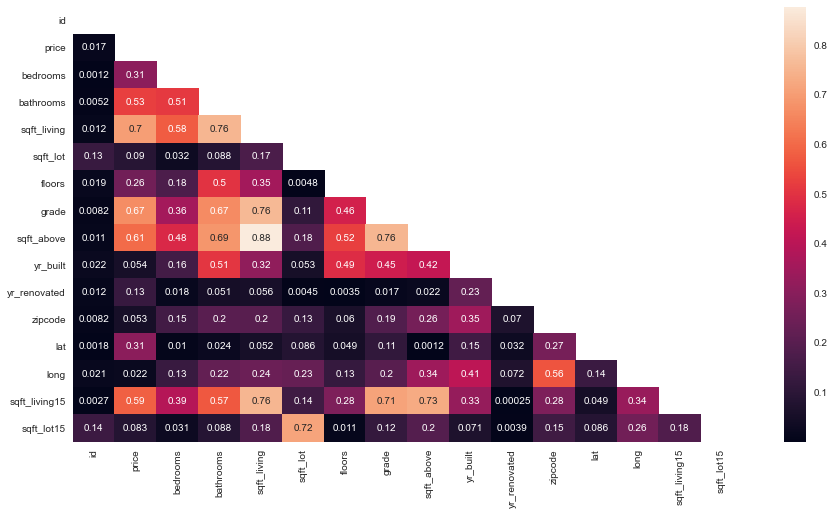

In [11]:
# Here we make up a heat map to see the variables that have the highest
# correlation with price and the variables that have high collinearity
corr = abs(housing_df.corr())
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), annot=True);

# We can see that sqft_above is collinear with sqft_living. 
# That's why we can replace sqft_above with boolean for new column 'basement'
# We also see collinearity between sqft_living and grade. square footage is numeric and continuous,
# easier to use than grade. We can drop grade.
# sqft_living is highest correlation to price 

Here we plot the correlation coefficients for all the numerical values. We see that the sqft_living variable has the highest correlation with price. It will be a great option for our first simple linear model. There is a lot of collinearity of different variables, so we will plan on getting rid of a lot of the redundant variables. A lot of information given by grade and sqft_above will probably be better explained by sqft_living, so we'll drop those two variables from the clean data frame.

## Feature Engineering

While knowing when a house was built can be a big factor in the value of the house, we thought that a making a new column that told us the age of the house when it was sold would be more accurate.

In [12]:
# feature engineering
# Created a year_sold column using the .dt to broadcast the .year to the whole column
housing_df['year_sold'] = housing_df['date'].dt.year
# then subtracted yr_built from year_sold to get the age_when_sold column
housing_df['age_when_sold'] = housing_df['year_sold'] - housing_df['yr_built']

Knowing about the exact size of the basement won't be as useful as knowing if the house has a basement at all. Size is better captured by sqft_living, so we created a new column that will tell us if the house has a basement or not instead.

In [13]:
# feature engineering 
# first we overwrite the basement formula by substracting sqft_above from sqft_living
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
# then we use the lamda function to return true for houses where sqft_basement is above 0
housing_df['basement'] = housing_df['sqft_basement'].map(lambda x: True if x > 0 else False)
# finally we turn it into type integer so that we can use the variable ohe style
housing_df['basement'] = housing_df['basement'].astype(int)

We created a pairplot here to look at different variables distributions and how they related to one another.

In [14]:
# created a numerical df to look at a pair plot of all the numerical values
numerical_df = housing_df[['price','bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'age_when_sold' ]]

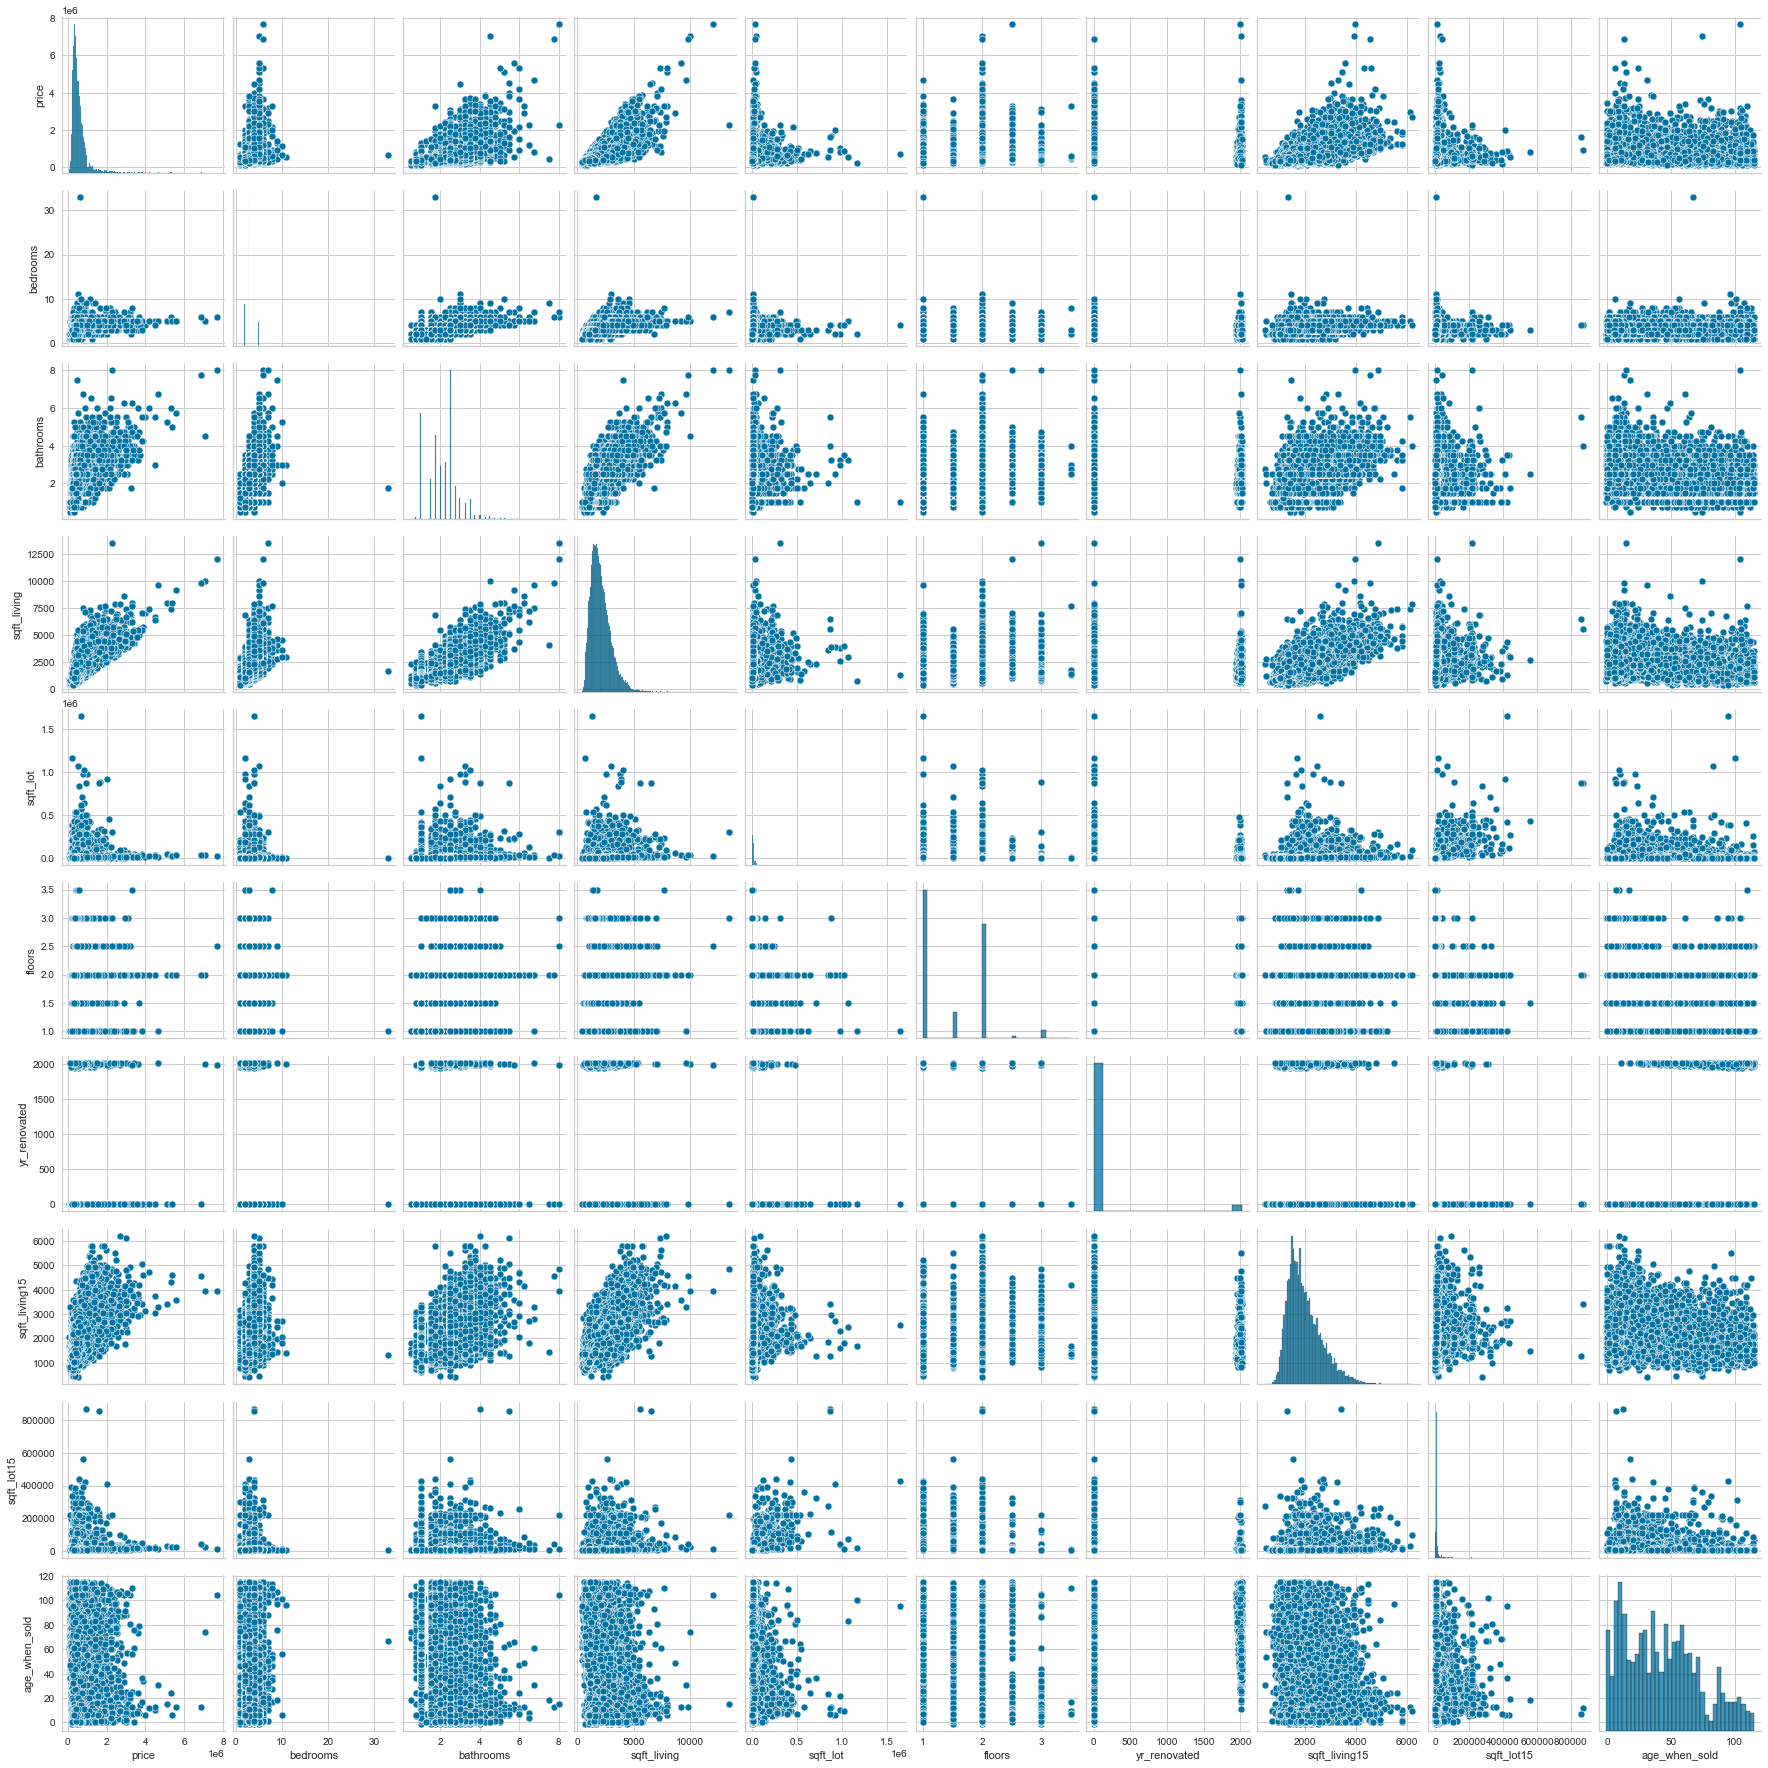

In [15]:
# plotted the pairplot
sns.pairplot(numerical_df);

We decided that this was good point to pare down what variables we were going to look at. A lot of variables were not related to price, id, date, sqft_lot, etc. We decide that these were good candidates to drop. We also figured that some of the variables were redundant, sqft_above, lat, long. We figured we could drop these and capture the same information better with other variables. 

In [16]:
# dropping numerical values that don't show relationship with price,
# as well as extraneous columns based on data processing above.
housing_df_clean = housing_df.drop(['id','date', 'sqft_lot15', 'sqft_lot', 'floors', 'grade','sqft_basement','sqft_above',
                                    'yr_built', 'year_sold', 'yr_renovated', 'lat', 'long', 'age_when_sold'], axis=1)
housing_df_clean

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,zipcode,sqft_living15,basement
0,221900.0,3,1.00,1180,NaN,NONE,Average,98178,1340,0
1,538000.0,3,2.25,2570,NO,NONE,Average,98125,1690,1
2,180000.0,2,1.00,770,NO,NONE,Average,98028,2720,0
3,604000.0,4,3.00,1960,NO,NONE,Very Good,98136,1360,1
4,510000.0,3,2.00,1680,NO,NONE,Average,98074,1800,0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,NO,NONE,Average,98103,1530,0
21593,400000.0,4,2.50,2310,NO,NONE,Average,98146,1830,0
21594,402101.0,2,0.75,1020,NO,NONE,Average,98144,1020,0
21595,400000.0,3,2.50,1600,NaN,NONE,Average,98027,1410,0


We ran one more heatmap, pairplot, and .describe() to look at the correlation coefficients, scatterplots, and descriptive statistics for our new cleaned data frame.

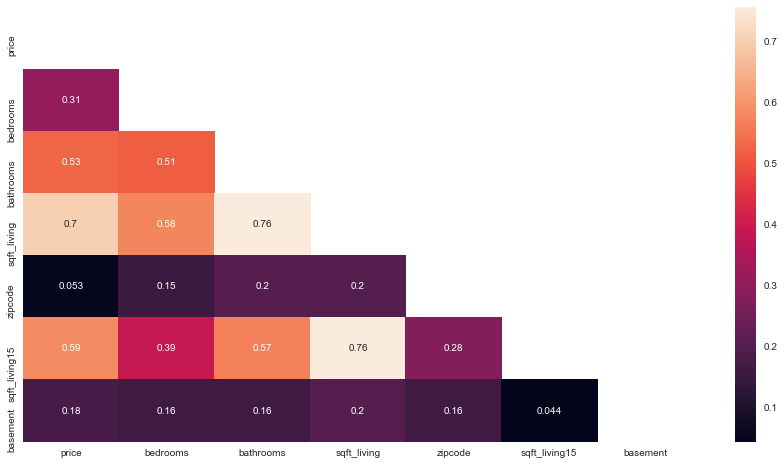

In [17]:
# another heatmap, this time of our new cleaned df
corr = abs(housing_df_clean.corr())
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), annot=True);

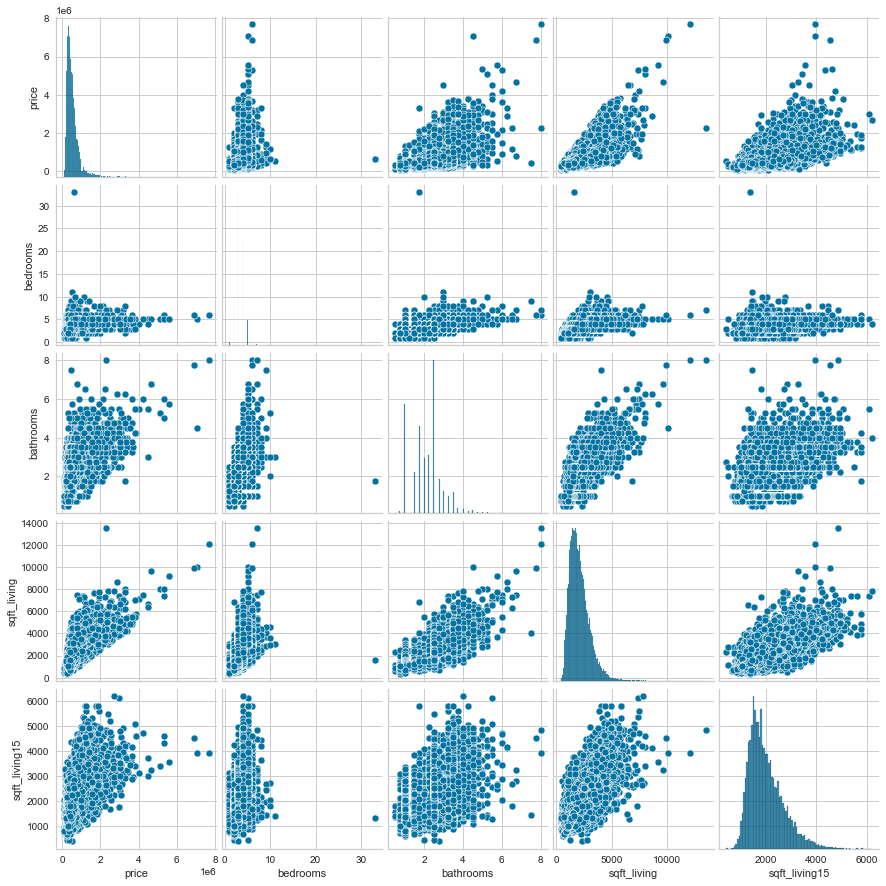

In [18]:
# Here we have a pairplot of all our new numerical data that made the cut
numerical_after_drop_df = housing_df_clean.drop(['waterfront', 'view', 'condition', 'zipcode', 'basement'], axis=1)
sns.pairplot(numerical_after_drop_df);

In [19]:
# Here's what the descriptive statistics of our new clean df looks like
housing_df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,zipcode,sqft_living15,basement
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,98077.951845,1986.620318,0.392971
std,3.673681e+05,0.926299,0.768984,918.106125,53.513072,685.230472,0.488422
min,7.800000e+04,1.000000,0.500000,370.000000,98001.000000,399.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,98033.000000,1490.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,98065.000000,1840.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,98118.000000,2360.000000,1.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,98199.000000,6210.000000,1.000000


A lot of our values still had these outlandish maximum values that would skew our results. We decided to use the .between() method to cut out the outliers for bathrooms, bedrooms, and sqft_living, which should improve our models accuracy.

In [20]:
# Filtering outliers to improve the fit of the model
# Take out the outermost 1% of results from bathrooms, then do the same for bedrooms and sqft_living
housing_df_clean['bathrooms'] = housing_df_clean['bathrooms'][housing_df_clean['bathrooms'].between(housing_df_clean['bathrooms'].quantile(.005), housing_df_clean['bathrooms'].quantile(.995), inclusive=True)]
housing_df_clean['bedrooms'] = housing_df_clean['bedrooms'][housing_df_clean['bedrooms'].between(housing_df_clean['bedrooms'].quantile(.005), housing_df_clean['bedrooms'].quantile(.995), inclusive=True)]
housing_df_clean['sqft_living'] = housing_df_clean['sqft_living'][housing_df_clean['sqft_living'].between(housing_df_clean['sqft_living'].quantile(.005), housing_df_clean['sqft_living'].quantile(.995), inclusive=True)]

In [21]:
# Here we had to use the dropna function to get rid of the rows 
# that had missing values due to the .between() function
housing_df_clean.dropna(inplace=True)

## Linear Modeling

Here we started splitting up our data to put it through the train_test_split function. We did this so we could see how our model would perform on the testing split that it had never seen before. 

In [22]:
# Here we set our X and y
X = housing_df_clean.drop(columns = 'price', axis=1)
y = housing_df_clean['price']

In [23]:
# Use the train_test_split function from sklearn to 
# keep our testing and training data separate from eachother
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

We used the simple imputer tool to fill in the missing values for view and waterfront with NONE and NO respectively so that we can use the variables in the linear regression models. 

### Transformation of Categorical Data

In [24]:
# here we use the Simple imputer to fill in the missing values for view
view_col = X_train[['view']]
imputer_view = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer_view.fit(view_col)
view_imputed = imputer_view.transform(view_col)
X_train.view = view_imputed

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
# here we perform the same function on the testing data
# that we just did on the training data
view_col = X_test[['view']]
view_imputed = imputer_view.transform(view_col)
X_test.view = view_imputed

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
# create the simple imputer for waterfront to replace the missing values
water_col = X_train[['waterfront']]
imputer_water = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer_water.fit(water_col)
waterfront_imputed = imputer_water.transform(water_col)
X_train.waterfront = waterfront_imputed

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
# perform the same transformation on the testing data
water_col = X_test[['waterfront']]
waterfront_test_imputed = imputer_water.transform(water_col)
X_test.waterfront = waterfront_test_imputed

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
# list of the categorical columns 
cat_cols = [ 'waterfront', 'view', 'condition', 'zipcode']

In [29]:
# confirm that all of our missing values are now filled
X_train.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
waterfront       0
view             0
condition        0
zipcode          0
sqft_living15    0
basement         0
dtype: int64

We used OneHotEncoder to transform the categorical data into a format that our models will be able to work with.



In [30]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [31]:
# here we create the new X_train_enc
X_train_enc = pd.DataFrame(X_train_enc.todense(), index=X_train.index, columns= ct.get_feature_names())

In [32]:
# and do the same for the test data
X_test_enc = pd.DataFrame(X_test_enc.todense(), index=X_test.index, columns= ct.get_feature_names())

We used the StandardScaler to see the scaled coefficients for each variable.

In [33]:
# intstantiate our scaler
scaler = StandardScaler()

# train on train data
scaler.fit(X_train_enc)

# transform both train and test data
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [34]:
# Here we update the X_train_scaled into a full df
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index ,columns= ct.get_feature_names())

In [35]:
# and do the same for testing data
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns= ct.get_feature_names())

We used the ordinal encoder on our ordinal categorical variables here to see if it would increase the performance of our model later on compared to one hot encoded categorical variables.

In [36]:
# Here we use the ordinal encoder to work with the view column in our regression
view_col = X_train[['view']]
encoder_view = OrdinalEncoder(categories=[["NONE","FAIR", "AVERAGE", "GOOD", "EXCELLENT"]])
encoder_view.fit(view_col)
encoded_view = encoder_view.transform(view_col)
encoded_view = encoded_view.flatten()
X_train.view = encoded_view

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
# once again, we must perform this on both testing and training data separately
view_col = X_test[['view']]
encoded_view = encoder_view.transform(view_col)
encoded_view = encoded_view.flatten()
X_test.view = encoded_view

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
# here we use the ordinal encoder on waterfront to make it usable for our regression
water_col = X_train[['waterfront']]
encoder_water = OrdinalEncoder()
encoder_water.fit(water_col)
encoded_water = encoder_water.transform(water_col)
encoded_water = encoded_water.flatten()
X_train.waterfront = encoded_water

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
# and perform this encoding on the X_test data
water_col = X_test[['waterfront']]
encoded_water = encoder_water.transform(water_col)
encoded_water = encoded_water.flatten()
X_test.waterfront = encoded_water

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [40]:
# create the cat_cols_ordinal variable to use in our column transformer
cat_cols_ordinal = ['condition', 'zipcode']
cat_cols_ordinal

['condition', 'zipcode']

We encoded the condition and the zipcode so we could implement these variables into our model.

In [41]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols_ordinal)],
                       remainder='passthrough')
ct.fit(X_train)
X_train_ord = ct.transform(X_train)
X_test_ord = ct.transform(X_test)

In [42]:
# turn the X_train_ord variable into a new dataframe with the ordinal variables
X_train_ord = pd.DataFrame(X_train_ord.todense(), index=X_train.index, columns= ct.get_feature_names())

In [43]:
# and do the same for testing data
X_test_ord = pd.DataFrame(X_test_ord.todense(), index=X_test.index, columns= ct.get_feature_names())

We scaled our X_test_ord here, so we could compare the coefficients between different variables.

In [44]:
# intstantiate our scaler
scaler = StandardScaler()

# train on train data
scaler.fit(X_train_ord)

# transform the train data
X_train_scaled_ord = scaler.transform(X_train_ord)

#refit scaler to test data
scaler.fit(X_test_ord)

# transform the data to scalar form
X_test_scaled_ord = scaler.transform(X_test_ord)

In [45]:
# Reassign the X_train_scaled_ord variable as a df
X_train_scaled_ord = pd.DataFrame(X_train_scaled_ord, index=X_train.index, columns= ct.get_feature_names())

In [46]:
# do the same for testing data
X_test_scaled_ord = pd.DataFrame(X_test_scaled_ord, index=X_test.index, columns= ct.get_feature_names())

We want to be able to quickly see the residual plots for each model we run, and we want to access all of the measures of performance for each test. This function will allow us to do this painlessly. The first function is for price and the second for the logarithm of price.

In [47]:
# Created a function to give us R-squared values, Durbin-Watson scores,
# Mean squared errors and root mean squared errors
# as well as plot residuals, their distributions, and a qqplot
def res_plots(model, X_train, X_test, y_train, y_test):
    
    # create the variables we need to get mean squared error
    # and to visualize our residuals
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_resids = y_train - train_preds
    test_resids = y_test - test_preds
    
    # gives us a Durbin-Watson score
    durbinWatson = durbin_watson(test_resids)
    
    # gives us the mean squared error and root mean squared error
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_rmse = mean_squared_error(y_test, test_preds, squared=False)
    
    # creates the visualizations of our residuals
    bins = int(  len(X_test)**.5 )
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9, 18), nrows=3)
    sns.histplot(test_resids, bins=bins, kde=True, ax=ax1)
    sm.qqplot(test_resids, line='r', ax=ax2)
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    
    plt.show()
    print(f'R2_train: {r2_score(y_train, train_preds):.3f}'),\
    print(f'R2_test: {r2_score(y_test, test_preds):.3f}'),\
    print(f'Durbin-Watson: {durbinWatson:.3f}'),\
    print(f'Train Mean Squarred Error: {train_mse:.3f}'),\
    print(f'Test Mean Squarred Error: {test_mse:.3f}'),\
    print(f'Test RMSE: {test_rmse:.3f}')
    

In [48]:

def res_plots_log(model, X_train, X_test, y_train, y_test):
    
    train_preds = np.exp(model.predict(X_train))
    test_preds = np.exp(model.predict(X_test))
    train_resids = np.exp(y_train) - train_preds
    test_resids = np.exp(y_test) - test_preds
    
    durbinWatson = durbin_watson(test_resids)
    
    train_mse = mean_squared_error(np.exp(y_train), train_preds)
    test_mse = mean_squared_error(np.exp(y_test), test_preds)
    test_rmse = mean_squared_error(np.exp(y_test), test_preds, squared=False)
    
    bins = int(  len(X_test)**.5 )
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9, 18), nrows=3)
    sns.histplot(test_resids, bins=bins, kde=True, ax=ax1)
    sm.qqplot(test_resids, line='r', ax=ax2)
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    
    plt.show()
    print(f'R2_train: {r2_score(y_train, np.log(train_preds)):.3f}'),\
    print(f'R2_test: {r2_score(y_test, np.log(test_preds)):.3f}'),\
    print(f'Durbin-Watson: {durbinWatson:.3f}'),\
    print(f'Train Mean Squarred Error: {train_mse:.3f}'),\
    print(f'Test Mean Squarred Error: {test_mse:.3f}'),\
    print(f'Test RMSE: {test_rmse:.3f}')

## Baseline Model

Here we set up our baseline model. Every models performance will be compared to our baseline model.

In [49]:
# Setting up our dummy regressor
dummy_regr = DummyRegressor()
dummy_regr.fit(X_train, y_train)
print(dummy_regr.score(X_train, y_train))
print(dummy_regr.score(X_test, y_test))

0.0
-0.00011378091138736224


## Simple Linear Regression

Here is our first linear model. It is a simple linear regression to see how the square footage of a house affects the houses price. 

In [50]:
# first simple model only looking at how sqft_living accounted for price

col_use = ['sqft_living']
fsm_model = LinearRegression()
fsm_model.fit(X_train_scaled[col_use], y_train)
print(fsm_model.score(X_train_scaled[col_use], y_train))
print(fsm_model.score(X_test_scaled[col_use], y_test))

0.4434770783789924
0.45638311722154457


For the first simple model, we did not perform poorly. Our model accounted for 46% of the variance in house prices. There was also not a large discrepency in how our model performed on the training data as opposed to the testing data. This will give us a good base to build upon.

In [51]:
# used statsmodels to get more indepth statistics on the model
fsm_model_ols = sm.OLS(y_train, sm.add_constant(X_train_scaled[col_use]))
fsm_model_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:06   Log-Likelihood:            -1.7429e+05
No. Observations:               12628   AIC:                         3.486e+05
Df Residuals:                   12626   BIC:                         3.486e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.298e+05   2124.396    249.392      0.000    5.26e+05    5.34e+05
sqft_living  2.131e+05   2124.396    100.306      0.000    2.09e+05    2.17e+05
==============================================================================
Omnibus:                     6363.203   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78315.138
Skew:                           2.126   Prob(JB):                         0.00
Kurtosis:                      14.435   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see here that the coefficient for square footage was 210,000 with a y intercept of 500,000. So an increase in square footage of one standard deviation, would result in an increase of price by \\$500,000.

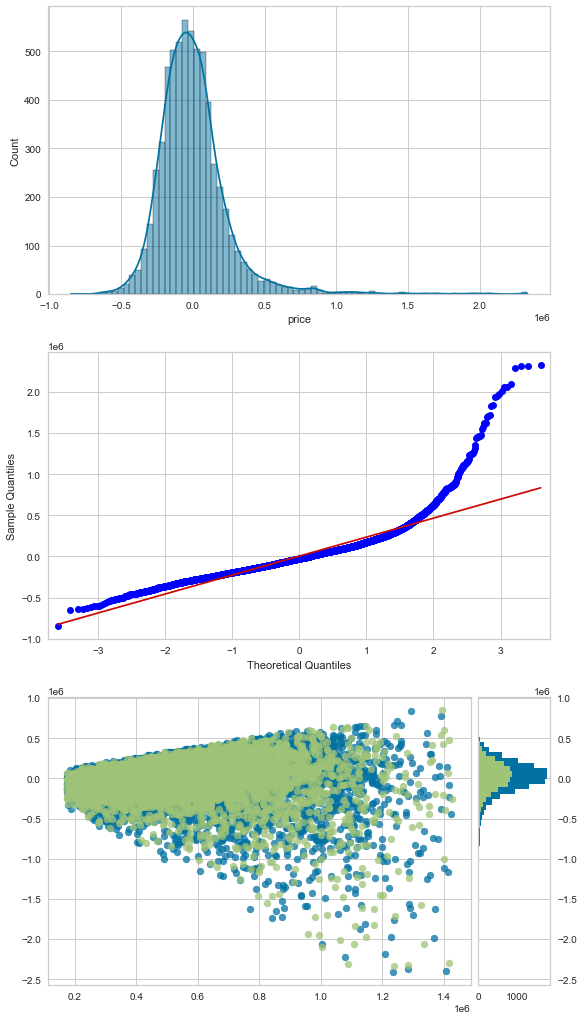

R2_train: 0.443
R2_test: 0.456
Durbin-Watson: 1.994
Train Mean Squarred Error: 56981895498.752
Test Mean Squarred Error: 63612524980.058
Test RMSE: 252215.235


In [52]:
# used our function to get all the information we wanted
res_plots(fsm_model, X_train_scaled[col_use], X_test_scaled[col_use], y_train, y_test)

The distribution of our residuals are not quite centered around zero, and that the errors are not normally distributed. This fails to meet the assumption of normally distributed error around zero. Our qqplot shows that the relationship in our model is fails to meet the assumption of a linear relationship. We also see our residuals for our first model fails to meet the assumption of homoskedasticity. These are three large weaknesses in the inferential validity of our first linear model. However we do meet the assumption of no autocorrelation according to our Durbin-Watson score. We achieved a RMSE of about \\$250,000, which is a lot of variance, but a good start.

## Multiple Linear Regression: Model 1

We made our first multiple linear regression here. Using multiple variables, we should be able to greatly increase the predictive power of our model. The easiest start to adding complexity to the model would be adding all of the cleaned numerical values.

In [53]:
# Then we decided to look at a model that only included the numerical variables
col_use = ['sqft_living','bedrooms','bathrooms','sqft_living15', 'basement']
mlr_1 = LinearRegression()
mlr_1.fit(X_train_scaled[col_use], y_train)
print(mlr_1.score(X_train_scaled[col_use], y_train))
print(mlr_1.score(X_test_scaled[col_use], y_test))

0.47692684780350747
0.4832364290167689


There was a slight improvement in the model, we could account for about 2% more of the variance. However, considering all of the extra complexity added by the variables, it's not clear if the higher R-squared of .48 is worth the tradeoff of extra complexity. However, the model is still not overfitted to the training data, so the complexity does not seem to be harming the model yet.

In [54]:
# get indepth statistics for our model
mlr_1_ols = sm.OLS(y_train, sm.add_constant(X_train_scaled[col_use]))
mlr_1_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     2302.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:09   Log-Likelihood:            -1.7390e+05
No. Observations:               12628   AIC:                         3.478e+05
Df Residuals:                   12622   BIC:                         3.479e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.298e+05   2059.890    257.202      0.000    5.26e+05    5.34e+05
sqft_living    1.848e+05   4197.712     44.026      0.000    1.77e+05    1.93e+05
bedrooms      -4.634e+04   2576.804    -17.982      0.000   -5.14e+04   -4.13e+04
bathrooms      6274.4983   3064.793      2.047      0.041     267.038    1.23e+04
sqft_living15  6.146e+04   3212.188     19.134      0.000    5.52e+04    6.78e+04
basement       2.458e+04   2134.709     11.513      0.000    2.04e+04    2.88e+04
==============================================================================
Omnibus:                     6345.267   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78320.452
Skew:                           2.117   Prob(JB):                         0.00
Kurtosis:                      14.442   Cond. No.                         4.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see that all of the variables had a significant impact upon the model, but bathrooms seemed to have the smallest effect. 

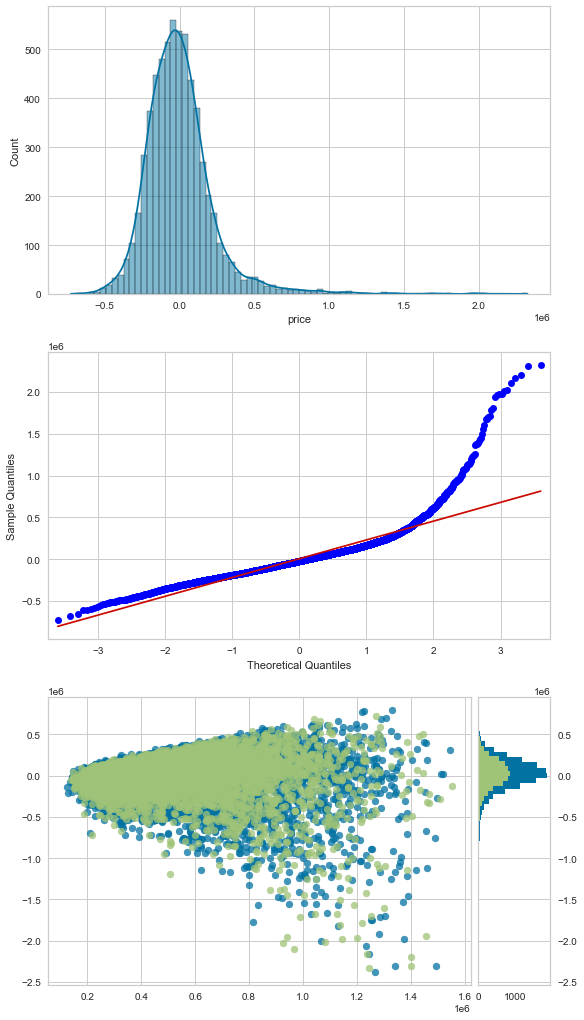

R2_train: 0.477
R2_test: 0.483
Durbin-Watson: 1.993
Train Mean Squarred Error: 53557002845.179
Test Mean Squarred Error: 60470225648.514
Test RMSE: 245906.945


In [55]:
res_plots(mlr_1, X_train_scaled[col_use], X_test_scaled[col_use], y_train, y_test)

We are still running into the problems of failing to meet the underlying assumptions of the linear models. All three of our plots show that we failed to meet the assumptions of normal distribution of error around zero, linear relationship, and homoskedasticity respectively. However, our Durbin-Watson score still meets the linear model assumption of autocorrelation. We slightly reduced the RMSE to just under \\$250,000, but the difference is negligible when assessing predictive validity. 

## Multiple Linear Regression: Model 2

For the second multiple linear regression model, we changed the target variable to the log of the price. This addresses the fanning that we saw in the residual plots, and make the errors much more homoskedastic. This will also make the target variable normally distributed and help increase the R-squared. 

In [56]:
# here, use np.log change the target variable to the log of price to give it a more normal distribution 
# and see if it will lead to any positive changes in our model
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

col_use = ['sqft_living','bedrooms','bathrooms','sqft_living15', 'basement',]
mlr_2 = LinearRegression()
mlr_2.fit(X_train_scaled[col_use], y_train_log)
print(mlr_2.score(X_train_scaled[col_use], y_train_log))
print(mlr_2.score(X_test_scaled[col_use], y_test_log))

0.4902486235018725
0.5083867534987281


Our model now accounts for half of the variance in pricing, which is another small improvement. This will also help with meeting the assumptions of the linear model. Our model is still performing well on the testing data it was not modelled on, so our model is still not overfit, as expected since we have not added any more variables to this model.

In [57]:
mlr_2_ols = sm.OLS(y_train_log, sm.add_constant(X_train_scaled[col_use]))
mlr_2_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     2428.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:11   Log-Likelihood:                -5083.9
No. Observations:               12628   AIC:                         1.018e+04
Df Residuals:                   12622   BIC:                         1.022e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0439      0.003   4049.176      0.000      13.038      13.050
sqft_living       0.2483      0.007     37.822      0.000       0.235       0.261
bedrooms         -0.0583      0.004    -14.461      0.000      -0.066      -0.050
bathrooms         0.0377      0.005      7.863      0.000       0.028       0.047
sqft_living15     0.1180      0.005     23.484      0.000       0.108       0.128
basement          0.0523      0.003     15.680      0.000       0.046       0.059
==============================================================================
Omnibus:                       28.195   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.582
Skew:                           0.056   Prob(JB):                     4.59e-06
Kurtosis:                       2.816   Cond. No.                         4.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

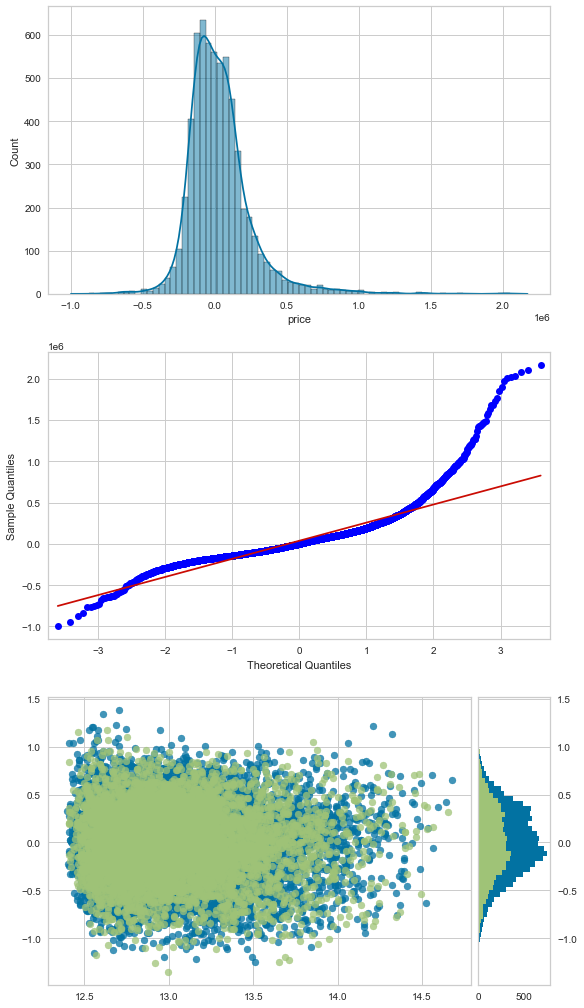

R2_train: 0.490
R2_test: 0.508
Durbin-Watson: 1.958
Train Mean Squarred Error: 52117935188.968
Test Mean Squarred Error: 59270964872.111
Test RMSE: 243456.289


In [58]:
# getting numbers and plotting figures for the second model
res_plots_log(mlr_2, X_train_scaled[col_use], X_test_scaled[col_use], y_train_log, y_test_log)

The distribution of the errors for this model was worse, so that is concerning. The qqplot also got worse which means we failed to meet the assumption of linearity, so we'll need to add some more complexity to the model to capture that. However, this time the residual plot looks much more clean and meets the assumption of homoskedasticity. The assumption of no autocorrelation was also met according to the Durbin-Watson score. The root mean squared error shifted a little closer to the \\$240,000 mark, but there was still a lot of room for improvement. 

## Multiple Linear Regression: Model 3

For the third multiple linear regression we added the view and waterfront variables to the model.

In [59]:
# Here we add our two categorical variables, waterfront and view, to our calculations
col_use = ['sqft_living','bedrooms','bathrooms','sqft_living15', 'basement','view', 'waterfront']
mlr_3 = LinearRegression()
mlr_3.fit(X_train_scaled_ord[col_use], y_train)
print(mlr_3.score(X_train_scaled_ord[col_use], y_train))
print(mlr_3.score(X_test_scaled_ord[col_use], y_test))

0.5283430634944137
0.5358479815157451


The R-squared improved a little, now over half of the variance in price is accounted for. The model is still performing well on the testing data and thus not overfitted. 

In [60]:
# Looking at the indepth statistics of the model
mlr_3_ols = sm.OLS(y_train, sm.add_constant(X_train_scaled_ord[col_use]))
mlr_3_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     2020.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:14   Log-Likelihood:            -1.7325e+05
No. Observations:               12628   AIC:                         3.465e+05
Df Residuals:                   12620   BIC:                         3.466e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.298e+05   1956.187    270.837      0.000    5.26e+05    5.34e+05
sqft_living    1.704e+05   4006.603     42.519      0.000    1.63e+05    1.78e+05
bedrooms      -3.716e+04   2459.624    -15.109      0.000    -4.2e+04   -3.23e+04
bathrooms      7546.3961   2911.440      2.592      0.010    1839.531    1.33e+04
sqft_living15  5.221e+04   3073.969     16.984      0.000    4.62e+04    5.82e+04
basement       1.638e+04   2052.366      7.979      0.000    1.24e+04    2.04e+04
view           4.988e+04   2237.219     22.298      0.000    4.55e+04    5.43e+04
waterfront     4.023e+04   2132.448     18.864      0.000     3.6e+04    4.44e+04
==============================================================================
Omnibus:                     5336.631   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53258.549
Skew:                           1.759   Prob(JB):                         0.00
Kurtosis:                      12.426   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

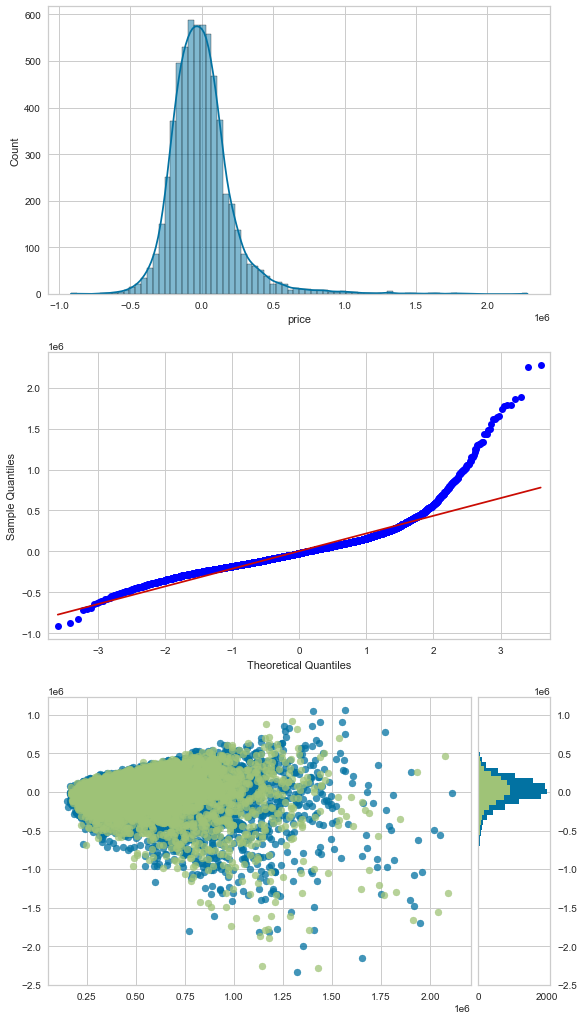

R2_train: 0.528
R2_test: 0.536
Durbin-Watson: 1.992
Train Mean Squarred Error: 48292541462.516
Test Mean Squarred Error: 54313769137.312
Test RMSE: 233053.147


In [61]:
# getting the numbers and plotting residuals
res_plots(mlr_3, X_train_scaled_ord[col_use], X_test_scaled_ord[col_use], y_train, y_test)

Our distribution of residuals started to look a little more normal although there were still many outliers on the positive side of error. The qqplot still looked rough, so there is still some complexity missing in the model. After not using the log of price for the target variable, the residual plot started fanning out again. The Durbin-Watson score is still meeting the assumptions of no autocorrelation. The RMSE dipped down to \\$230,000, so that was a step in the right direction, reflected by the higher R-squared.

## Multiple Linear Regresion: Model 4

For the fourth multiple linear regression model, all of the categorical variables were included. This added zipcodes into the model, greatly improving the strength of the model, which makes sense given how important location is in determining real estate prices. 

In [62]:
# Here, we looked at all of the categorical variables in 
# the form of one hot encoders along with the rest of the variables

col_use = X_train_scaled
mlr_4 = LinearRegression()
mlr_4.fit(X_train_scaled, y_train)
print(mlr_4.score(X_train_scaled, y_train))
print(mlr_4.score(X_test_scaled, y_test))

0.7989391378055755
0.7990134323617074


The only new variable we added in this model was zipcode, but it seemed to do a lot of heavy lifting for our model. The R-squared jumped all the way up to nearly .8, which is quite a powerful model. A few of the zipcodes have t-scores suggesting they would make poor predictors, but this is expected given how many different zipcodes there are, that some wouldn't actually have a large impact on price. However there is one problem with the zipcodes columns, there is potential for large amounts of collinearity. However, the condition number was only 13.6, which suggests that it wasn't that much of a problem for the model.

In [63]:
mlr_4_ols = sm.OLS(y_train, sm.add_constant(X_train_scaled))
mlr_4_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     600.5
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:18   Log-Likelihood:            -1.6786e+05
No. Observations:               12628   AIC:                         3.359e+05
Df Residuals:                   12544   BIC:                         3.365e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.298e+05   1281.069    413.567      0.000    5.27e+05    5.32e+05
ohe__x0_YES        4.117e+04   1613.169     25.520      0.000     3.8e+04    4.43e+04
ohe__x1_EXCELLENT  3.019e+04   1737.438     17.377      0.000    2.68e+04    3.36e+04
ohe__x1_FAIR       2482.8729   1475.158      1.683      0.092    -408.663    5374.408
ohe__x1_GOOD       1.463e+04   1556.351      9.399      0.000    1.16e+04    1.77e+04
ohe__x1_NONE      -2.199e+04   1899.908    -11.576      0.000   -2.57e+04   -1.83e+04
ohe__x2_Fair       1008.6049   1293.606      0.780      0.436   -1527.060    3544.270
ohe__x2_Good       8665.3627   1394.197      6.215      0.000    5932.523    1.14e+04
ohe__x2_Poor      -3885.9563   1289.156     -3.014      0.003   -6412.900   -1359.013
ohe__x2_Very Good  1.648e+04   1343.080     12.269      0.000    1.38e+04    1.91e+04
ohe__x3_98002      2161.4505   1579.013      1.369      0.171    -933.657    5256.558
ohe__x3_98003      1334.3568   1688.731      0.790      0.429   -1975.815    4644.529
ohe__x3_98004      9.242e+04   1708.694     54.086      0.000    8.91e+04    9.58e+04
ohe__x3_98005      3.282e+04   1577.265     20.810      0.000    2.97e+04    3.59e+04
ohe__x3_98006      4.383e+04   1892.471     23.161      0.000    4.01e+04    4.75e+04
ohe__x3_98007      2.125e+04   1473.207     14.424      0.000    1.84e+04    2.41e+04
ohe__x3_98008      3.218e+04   1700.017     18.926      0.000    2.88e+04    3.55e+04
ohe__x3_98010      3971.6406   1430.277      2.777      0.005    1168.079    6775.202
ohe__x3_98011      1.323e+04   1598.304      8.278      0.000    1.01e+04    1.64e+04
ohe__x3_98014      7272.4652   1455.215      4.998      0.000    4420.020    1.01e+04
ohe__x3_98019      8242.7405   1579.254      5.219      0.000    5147.161    1.13e+04
ohe__x3_98022       140.4927   1609.499      0.087      0.930   -3014.372    3295.357
ohe__x3_98023     -2562.8607   1944.726     -1.318      0.188   -6374.822    1249.101
ohe__x3_98024       1.12e+04   1426.175      7.855      0.000    8407.057     1.4e+04
ohe__x3_98027      2.407e+04   1803.420     13.349      0.000    2.05e+04    2.76e+04
ohe__x3_98028      1.432e+04   1670.200      8.575      0.000     1.1e+04    1.76e+04
ohe__x3_98029      2.861e+04   1748.412     16.362      0.000    2.52e+04     3.2e+04
ohe__x3_98030       171.5558   1678.330      0.102      0.919   -3118.227    3461.339
ohe__x3_98031      2206.1217   1642.853      1.343      0.179   -1014.122    5426.366
ohe__x3_98032      1073.2551   1487.239      0.722      0.471   -1841.961    3988.471
ohe__x3_98033      5.335e+04   1857.312     28.725      0.000    4.97e+04     5.7e+04
ohe__x3_98034      3.559e+04   1967.240     18.091      0.000    3.17e+04    3.94e+04
ohe__x3_98038      3585.8360   2017.321      1.778      0.076    -368.422

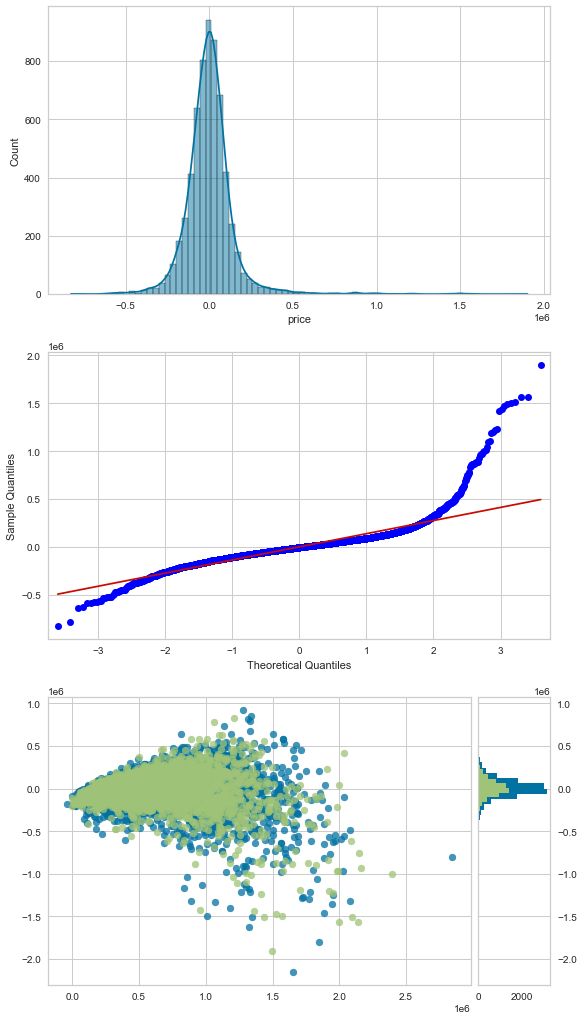

R2_train: 0.799
R2_test: 0.799
Durbin-Watson: 1.968
Train Mean Squarred Error: 20586445936.640
Test Mean Squarred Error: 23518885192.088
Test RMSE: 153358.682


In [64]:
# getting measures for the model and plotting residuals
res_plots(mlr_4, X_train_scaled, X_test_scaled, y_train, y_test)

This graph made the distribution of the errors much more normal, and while there are still outliers, the skew of the histogram does not seem that bad. The qqplot still looks rough, we may not have the data or methodology to address the non-linearity of the model. The residual plot still looks heteroskedastic, but looks like it has improved a little. Durbin-Watson is still safely within the threshold of no autocorrelation. RMSE plummeted to \\$150,000, and while this is not a safe prediction, it is has improved vastly and can maybe be used as a supplemental tool now.

## Multiple Linear Regression: Model 5

We made a model that turned the view and waterfront variables into ordinal variables for the fifth multiple linear regression.

In [65]:
# For this model, we use the ordinal encoder versions for view and waterfront
col_use = X_train_scaled_ord
mlr_5 = LinearRegression()
mlr_5.fit(X_train_scaled_ord, y_train)
print(mlr_5.score(X_train_scaled_ord, y_train))
print(mlr_5.score(X_test_scaled_ord, y_test))

0.7971429232698508
0.7955604438105388


This model performed almost identically to the non-ordinal version, so there doesn't seem to be any advantage to changing the way the variable was encoded.

In [66]:
# looking at the in-depth statistics
mlr_5_ols = sm.OLS(y_train, sm.add_constant(X_train_scaled_ord))
mlr_5_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     616.3
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:20   Log-Likelihood:            -1.6792e+05
No. Observations:               12628   AIC:                         3.360e+05
Df Residuals:                   12547   BIC:                         3.366e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.298e+05   1286.625    411.781      0.000    5.27e+05    5.32e+05
ohe__x0_Fair        951.3184   1299.203      0.732      0.464   -1595.318    3497.955
ohe__x0_Good       8898.9664   1400.032      6.356      0.000    6154.689    1.16e+04
ohe__x0_Poor      -3849.1683   1294.712     -2.973      0.003   -6387.002   -1311.335
ohe__x0_Very Good  1.672e+04   1347.720     12.406      0.000    1.41e+04    1.94e+04
ohe__x1_98002      2181.7946   1585.836      1.376      0.169    -926.686    5290.275
ohe__x1_98003      1177.5184   1695.670      0.694      0.487   -2146.255    4501.292
ohe__x1_98004       9.26e+04   1714.677     54.006      0.000    8.92e+04     9.6e+04
ohe__x1_98005      3.292e+04   1583.977     20.783      0.000    2.98e+04     3.6e+04
ohe__x1_98006      4.378e+04   1900.652     23.037      0.000    4.01e+04    4.75e+04
ohe__x1_98007      2.118e+04   1479.577     14.312      0.000    1.83e+04    2.41e+04
ohe__x1_98008      3.222e+04   1707.115     18.877      0.000    2.89e+04    3.56e+04
ohe__x1_98010      3936.1603   1436.381      2.740      0.006    1120.634    6751.686
ohe__x1_98011      1.331e+04   1605.176      8.292      0.000    1.02e+04    1.65e+04
ohe__x1_98014      7059.2378   1461.365      4.831      0.000    4194.739    9923.736
ohe__x1_98019      8249.3026   1586.099      5.201      0.000    5140.305    1.14e+04
ohe__x1_98022      -486.8680   1615.292     -0.301      0.763   -3653.088    2679.352
ohe__x1_98023     -2535.3805   1953.047     -1.298      0.194   -6363.652    1292.891
ohe__x1_98024      1.102e+04   1432.246      7.691      0.000    8207.969    1.38e+04
ohe__x1_98027      2.403e+04   1811.226     13.267      0.000    2.05e+04    2.76e+04
ohe__x1_98028       1.44e+04   1677.403      8.584      0.000    1.11e+04    1.77e+04
ohe__x1_98029      2.848e+04   1755.949     16.219      0.000     2.5e+04    3.19e+04
ohe__x1_98030       183.4002   1685.606      0.109      0.913   -3120.645    3487.446
ohe__x1_98031      2205.0723   1649.976      1.336      0.181   -1029.133    5439.278
ohe__x1_98032      1105.0195   1493.669      0.740      0.459   -1822.800    4032.839
ohe__x1_98033      5.328e+04   1864.915     28.569      0.000    4.96e+04    5.69e+04
ohe__x1_98034      3.563e+04   1975.623     18.032      0.000    3.18e+04    3.95e+04
ohe__x1_98038      3654.0112   2026.045      1.804      0.071    -317.348    7625.370
ohe__x1_98039      4.619e+04   1362.681     33.893      0.000    4.35e+04    4.89e+04
ohe__x1_98040      5.692e+04   1673.617     34.010      0.000    5.36e+04    6.02e+04
ohe__x1_98042       162.6875   1989.443      0.082      0.935   -3736.925    4062.300
ohe__x1_98045      1.068e+04   1627.139      6.564      0.000    7491.455    1.39e+04
ohe__x1_98052      4.188e+04   2027.869     20.650      0.000    3.79e+04

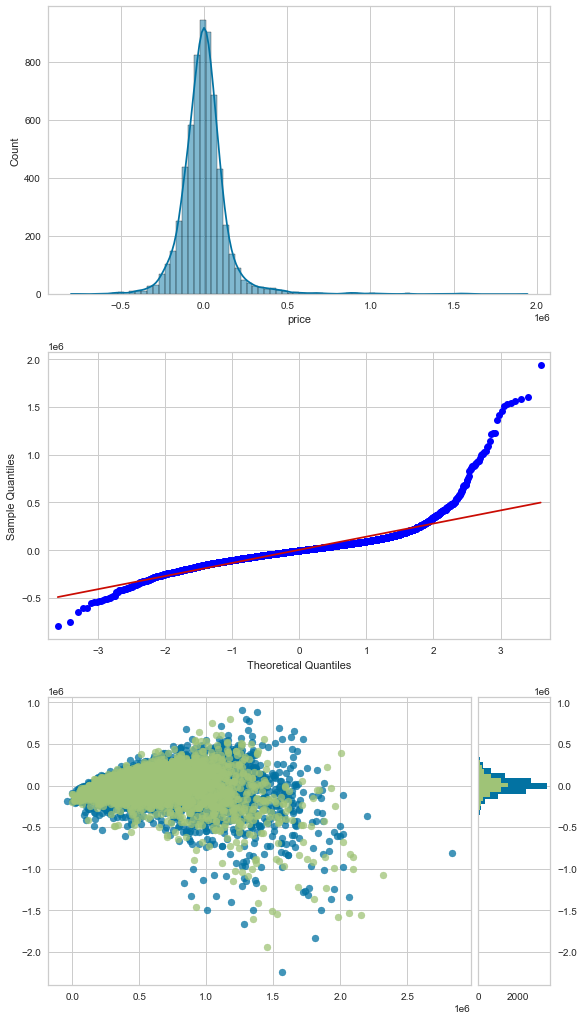

R2_train: 0.797
R2_test: 0.796
Durbin-Watson: 1.964
Train Mean Squarred Error: 20770358772.916
Test Mean Squarred Error: 23922944240.704
Test RMSE: 154670.438


In [67]:
# getting the model performance figures and plotting the residuals
res_plots(mlr_5, X_train_scaled_ord, X_test_scaled_ord, y_train, y_test)

The residual plots and predictive scores look nearly identical to the model above as well.

## Multiple Linear Regression: Model 6

For the sixth model we returned to using the log of price as our target variable. This provided a considerable increase the R-squared value.

In [68]:
# changing the target variable from price to the log of price to see how it effects our performance
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

col_use = X_train_scaled_ord
mlr_6 = LinearRegression()
mlr_6.fit(X_train_scaled_ord, y_train_log)
print(mlr_6.score(X_train_scaled_ord, y_train_log))
print(mlr_6.score(X_test_scaled_ord, y_test_log))

0.8562404255986689
0.8555443760100776


Here we achieved another big jump in the performance of our model going from an R-squared of about .80 to one of about .86. When we take the log of price, the target variable much more closely resembles a normal distribution. It seems that our model has a much better time predicting when the distribution is more normal. We are still performing just as well on our testing data too.

In [69]:
# looking at the in-depth statistics for the model
mlr_6_ols = sm.OLS(y_train_log, sm.add_constant(X_train_scaled_ord))
mlr_6_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     934.1
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:22   Log-Likelihood:                 2908.2
No. Observations:               12628   AIC:                            -5654.
Df Residuals:                   12547   BIC:                            -5051.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0439      0.002   7602.096      0.000      13.041      13.047
ohe__x0_Fair         -0.0081      0.002     -4.698      0.000      -0.012      -0.005
ohe__x0_Good          0.0175      0.002      9.385      0.000       0.014       0.021
ohe__x0_Poor         -0.0122      0.002     -7.072      0.000      -0.016      -0.009
ohe__x0_Very Good     0.0246      0.002     13.672      0.000       0.021       0.028
ohe__x1_98002        -0.0032      0.002     -1.505      0.132      -0.007       0.001
ohe__x1_98003         0.0044      0.002      1.947      0.052   -3.06e-05       0.009
ohe__x1_98004         0.1328      0.002     58.088      0.000       0.128       0.137
ohe__x1_98005         0.0741      0.002     35.067      0.000       0.070       0.078
ohe__x1_98006         0.0949      0.003     37.448      0.000       0.090       0.100
ohe__x1_98007         0.0530      0.002     26.885      0.000       0.049       0.057
ohe__x1_98008         0.0798      0.002     35.031      0.000       0.075       0.084
ohe__x1_98010         0.0160      0.002      8.372      0.000       0.012       0.020
ohe__x1_98011         0.0458      0.002     21.400      0.000       0.042       0.050
ohe__x1_98014         0.0264      0.002     13.535      0.000       0.023       0.030
ohe__x1_98019         0.0340      0.002     16.077      0.000       0.030       0.038
ohe__x1_98022         0.0082      0.002      3.787      0.000       0.004       0.012
ohe__x1_98023        -0.0011      0.003     -0.406      0.685      -0.006       0.004
ohe__x1_98024         0.0310      0.002     16.219      0.000       0.027       0.035
ohe__x1_98027         0.0686      0.002     28.413      0.000       0.064       0.073
ohe__x1_98028         0.0476      0.002     21.285      0.000       0.043       0.052
ohe__x1_98029         0.0780      0.002     33.326      0.000       0.073       0.083
ohe__x1_98030         0.0062      0.002      2.773      0.006       0.002       0.011
ohe__x1_98031         0.0098      0.002      4.442      0.000       0.005       0.014
ohe__x1_98032        -0.0017      0.002     -0.849      0.396      -0.006       0.002
ohe__x1_98033         0.1131      0.002     45.459      0.000       0.108       0.118
ohe__x1_98034         0.0894      0.003     33.945      0.000       0.084       0.095
ohe__x1_98038         0.0273      0.003     10.089      0.000       0.022       0.033
ohe__x1_98039         0.0563      0.002     30.967      0.000       0.053       0.060
ohe__x1_98040         0.0969      0.002     43.410      0.000       0.093       0.101
ohe__x1_98042         0.0111      0.003      4.167      0.000       0.006       0.016
ohe__x1_98045         0.0375      0.002     17.302      0.000       0.033       0.042
ohe__x1_98052         0.1090      0.003     40.314      0.000       0.104

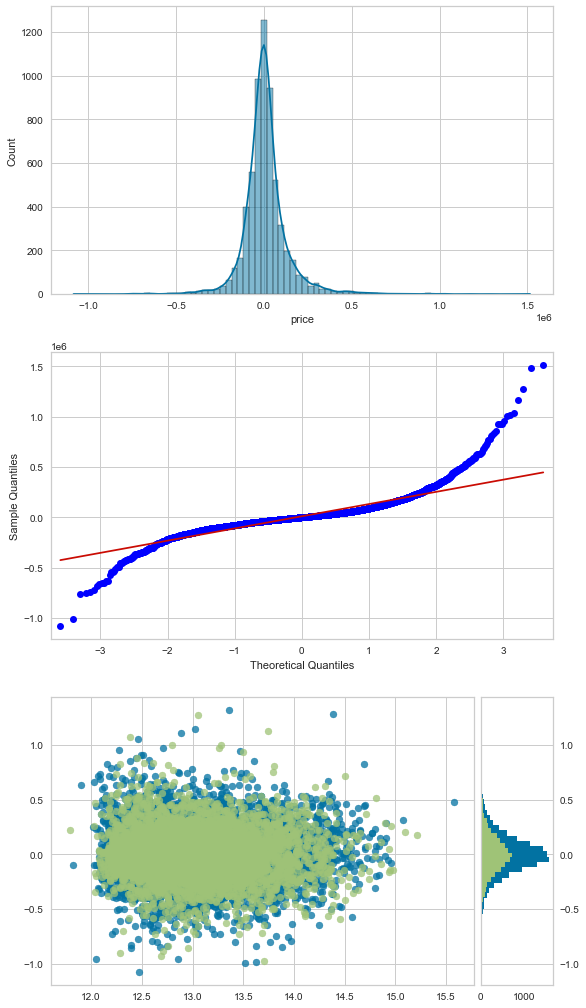

R2_train: 0.856
R2_test: 0.856
Durbin-Watson: 1.992
Train Mean Squarred Error: 16438933468.790
Test Mean Squarred Error: 17801171956.922
Test RMSE: 133421.033


In [70]:
# getting the numbers for performance and plotting the residuals
res_plots_log(mlr_6, X_train_scaled_ord, X_test_scaled_ord, y_train_log, y_test_log)

Our residual distribution and residual plot looked much better. It looks normally distributed around zero and homoskedastic. The qqplot still leaves room for improvement, so it seems that the relationship is not linear. The RMSE is now around \\$130,000, a huge improvement.

### Recursive Feature Elimination

Running the recursive feature elimination helped pick out the top half of the predictors from the model above.

In [71]:
# Make a new model to explore how each feature impacts the model
mlr_6_rfe = LinearRegression()

# Instantiate our RFE with that new model and how many features we want, first cutting features in half
rfe = RFE(mlr_6_rfe, n_features_to_select=40)

# Fit to our polynomial training data
rfe.fit(X_train_scaled_ord, y_train_log)

RFE(estimator=LinearRegression(), n_features_to_select=40)

In [72]:
# here we ran a for loop to get a list of the variables that we want to keep in
# our model after the recursive feature eliminator lops off the least valuable variables
rfe_selectors = []

for col_name, support in dict(zip(X_train_scaled_ord.columns, rfe.support_)).items():
    if support == True:
        rfe_selectors.append(col_name)


## Multiple Linear Regression: Model 7

Here we used the rfe_selectors we generated above to only use the top 40 predictors. 

In [73]:
# model with ohe and ordinal encoders and log price, but with top half of variables through RFE

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

col_use = X_train_scaled_ord[rfe_selectors]
mlr_7 = LinearRegression()
mlr_7.fit(X_train_scaled_ord[rfe_selectors], y_train_log)
print(mlr_7.score(X_train_scaled_ord[rfe_selectors], y_train_log))
print(mlr_7.score(X_test_scaled_ord[rfe_selectors], y_test_log))

0.809432792927224
0.8216002737955462


So here we lost a bit of predictive power, but we simplified the model greatly. However, by simplifying the model we lost track of the impact that a lot of our zipcodes provided. There is a lot of value in knowing the impact of every zipcode, even ones that don't make a large impact on price.

In [74]:
# looking at the model's in-depth statistics
mlr_7_ols = sm.OLS(y_train_log, sm.add_constant(X_train_scaled_ord[rfe_selectors]))
mlr_7_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1337.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:27   Log-Likelihood:                 1128.5
No. Observations:               12628   AIC:                            -2175.
Df Residuals:                   12587   BIC:                            -1870.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0439      0.002   6613.309      0.000      13.040      13.048
ohe__x1_98004     0.1078      0.002     53.563      0.000       0.104       0.112
ohe__x1_98005     0.0549      0.002     27.494      0.000       0.051       0.059
ohe__x1_98006     0.0653      0.002     32.063      0.000       0.061       0.069
ohe__x1_98007     0.0383      0.002     19.325      0.000       0.034       0.042
ohe__x1_98008     0.0562      0.002     28.229      0.000       0.052       0.060
ohe__x1_98027     0.0417      0.002     20.797      0.000       0.038       0.046
ohe__x1_98029     0.0551      0.002     27.573      0.000       0.051       0.059
ohe__x1_98033     0.0850      0.002     42.415      0.000       0.081       0.089
ohe__x1_98034     0.0582      0.002     29.068      0.000       0.054       0.062
ohe__x1_98039     0.0465      0.002     23.464      0.000       0.043       0.050
ohe__x1_98040     0.0745      0.002     36.933      0.000       0.071       0.078
ohe__x1_98052     0.0759      0.002     37.581      0.000       0.072       0.080
ohe__x1_98053     0.0545      0.002     27.000      0.000       0.051       0.059
ohe__x1_98072     0.0339      0.002     16.965      0.000       0.030       0.038
ohe__x1_98074     0.0541      0.002     26.765      0.000       0.050       0.058
ohe__x1_98075     0.0471      0.002     22.946      0.000       0.043       0.051
ohe__x1_98102     0.0546      0.002     27.609      0.000       0.051       0.059
ohe__x1_98103     0.1070      0.002     52.953      0.000       0.103       0.111
ohe__x1_98105     0.0815      0.002     41.013      0.000       0.078       0.085
ohe__x1_98107     0.0742      0.002     37.197      0.000       0.070       0.078
ohe__x1_98109     0.0564      0.002     28.512      0.000       0.053       0.060
ohe__x1_98112     0.0956      0.002     47.959      0.000       0.092       0.099
ohe__x1_98115     0.1039      0.002     51.646      0.000       0.100       0.108
ohe__x1_98116     0.0734      0.002     36.550      0.000       0.069       0.077
ohe__x1_98117     0.0996      0.002     49.407      0.000       0.096       0.104
ohe__x1_98118     0.0392      0.002     19.491      0.000       0.035       0.043
ohe__x1_98119     0.0785      0.002     39.497      0.000       0.075       0.082
ohe__x1_98122     0.0737      0.002     37.010      0.000       0.070       0.078
ohe__x1_98125     0.0486      0.002     24.305      0.000       0.045       0.053
ohe__x1_98126     0.0453      0.002     22.587      0.000       0.041       0.049
ohe__x1_98133     0.0414      0.002     20.622      0.000       0.037       0.045
ohe__x1_98136     0.0559      0.002     27.959      0.000       0.052       0.060
ohe__x1_98144     0.0583      0.002     29.200      0.000       0.054       0.062
ohe__x1_98155     0.0355      0.002     17.712   

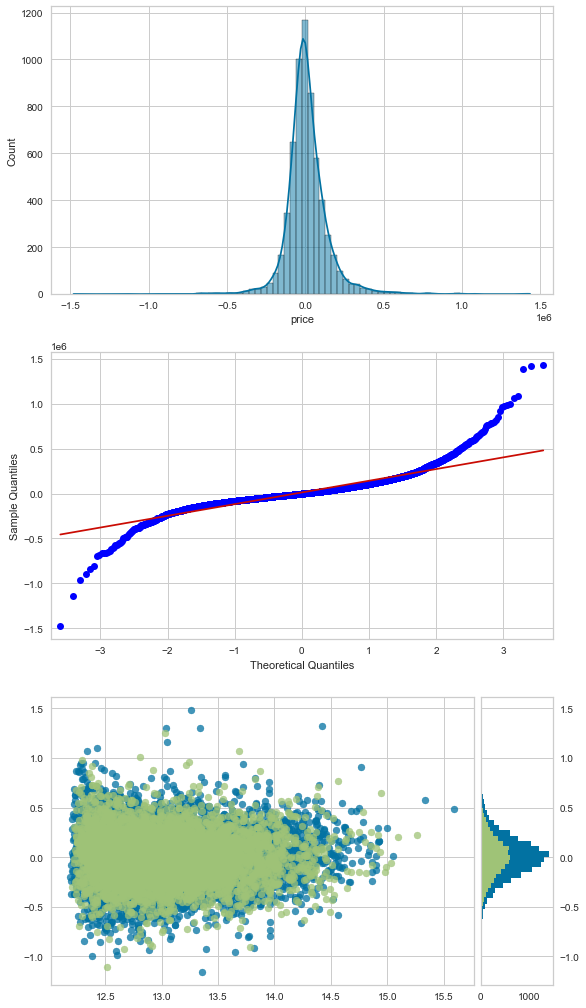

R2_train: 0.809
R2_test: 0.822
Durbin-Watson: 1.982
Train Mean Squarred Error: 19415972942.370
Test Mean Squarred Error: 20026644191.592
Test RMSE: 141515.526


In [75]:
# getting the performance numbers and plotting the residuals
res_plots_log(mlr_7, X_train_scaled_ord[rfe_selectors], X_test_scaled_ord[rfe_selectors], y_train_log, y_test_log)

The residual plots look nearly identical for this graph, which makes sense given the large overlap in the variables for the two models. However, the RMSE is a decent bit worse, which is what was expected.

Here we ran one more recursive feature eliminator to see what would happen when paring down to the top ten predictors.

### Second Round of RFE

In [76]:
# Make a new model to explore how each feature impacts the model
mlr_7_rfe = LinearRegression()

# Instantiate our RFE with that new model and how many features we want but we found top 10 
rfe = RFE(mlr_7_rfe, n_features_to_select=10)

# Fit to our polynomial training data
rfe.fit(X_train_scaled_ord, y_train_log)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [77]:
# use the same for loop from before to get our top 10 predictors
rfe_selectors = []

for col_name, support in dict(zip(X_train_scaled_ord.columns, rfe.support_)).items():
    if support == True:
        rfe_selectors.append(col_name)


## Multiple Linear Regression: Model 8

This is a linear model only using the top ten predictors established above. The R-squared for this model tanked.

In [78]:
# model with ohe and ordinal encoders and log price, but with top 10 through RFE

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

col_use = X_train_scaled_ord[rfe_selectors]
mlr_8 = LinearRegression()
mlr_8.fit(X_train_scaled_ord[rfe_selectors], y_train_log)
print(mlr_8.score(X_train_scaled_ord[rfe_selectors], y_train_log))
print(mlr_8.score(X_test_scaled_ord[rfe_selectors], y_test_log))

0.6040480879284353
0.6208546326390868


After only using our top 10 predictors, our performance tanks. This makes sense, since removing all the variables is removing a lot of our zipcodes from our model. We now only have seven zipcodes in this model, so if we look at two similiar houses outside of those seven zipcodes, it would treat those houses as nearly identical even if one was downtown and the other in the suburbs. So using RFE to perform feature selection seems like a bad method given the nature of our model.

In [79]:
# looking at the in-depth statistics for the model
mlr_8_ols = sm.OLS(y_train_log, sm.add_constant(X_train_scaled_ord[rfe_selectors]))
mlr_8_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1925.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:36   Log-Likelihood:                -3488.8
No. Observations:               12628   AIC:                             7000.
Df Residuals:                   12617   BIC:                             7082.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0439      0.003   4593.446      0.000      13.038      13.050
ohe__x1_98004     0.0782      0.003     27.299      0.000       0.073       0.084
ohe__x1_98103     0.0726      0.003     25.324      0.000       0.067       0.078
ohe__x1_98105     0.0573      0.003     20.164      0.000       0.052       0.063
ohe__x1_98112     0.0697      0.003     24.499      0.000       0.064       0.075
ohe__x1_98115     0.0686      0.003     24.023      0.000       0.063       0.074
ohe__x1_98117     0.0666      0.003     23.268      0.000       0.061       0.072
ohe__x1_98119     0.0561      0.003     19.739      0.000       0.051       0.062
sqft_living       0.2378      0.004     54.616      0.000       0.229       0.246
view              0.0791      0.003     26.722      0.000       0.073       0.085
sqft_living15     0.1136      0.004     25.786      0.000       0.105       0.122
==============================================================================
Omnibus:                        4.402   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.371
Skew:                          -0.044   Prob(JB):                        0.112
Kurtosis:                       3.024   Cond. No.                         2.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final RFE

This RFE was used to see which of the non-zipcode variables were good contenders for being dropped. 

In [80]:
# Here we wanted to see the which of the numerical values we could get rid of without
# impacting the zipcodes, since we wanted to keep all of them
col_use = ['sqft_living','bedrooms','bathrooms','sqft_living15', 'basement','view', 'waterfront']
mlr_8_rfe = LinearRegression()

rfe = RFE(mlr_8_rfe, n_features_to_select=5)

rfe.fit(X_train_scaled_ord[col_use], y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [81]:
# same rfe selectors list loop from before
rfe_selectors = []

for col_name, support in dict(zip(X_train_scaled_ord[col_use].columns, rfe.support_)).items():
    if support == True:
        rfe_selectors.append(col_name)
rfe_selectors

['sqft_living', 'bedrooms', 'sqft_living15', 'view', 'waterfront']

In [82]:
# We see that bedrooms and basement are not good predictors, so we drop these from the model
X_train_scaled_ord = X_train_scaled_ord.drop(columns= ['bedrooms','basement'])
X_test_scaled_ord = X_test_scaled_ord.drop(columns= ['bedrooms','basement'])

## Multiple Linear Regression: Final Predictive Model

We ran our final predictive model here, dropping the basement and bedrooms columns. We retained a nearly identical R-squared after dropping these two variables. 

In [83]:
# model with ohe and ordinal encoders and log price, all the zipcodes,
# and with dropped numerical 'bedrooms' and 'basement' columns through RFE 

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

col_use = X_train_scaled_ord
mlr_9 = LinearRegression()
mlr_9.fit(X_train_scaled_ord, y_train_log)
print(mlr_9.score(X_train_scaled_ord, y_train_log))
print(mlr_9.score(X_test_scaled_ord, y_test_log))

0.8542525457886809
0.8540411450200394


Here we see after dropping bedrooms and basement, that we are at nearly the exact same R-squared value of .86. Our model held up just as well after dropping those columns, and removing two variables should slightly decrease the complexity of our model. Even though our model isn't overfit, it still has nearly 80 variables, so figuring out a way to better capture location without all the zipcode categories could be a way for us to improve the model with more data and time.

In [84]:
# looking at in-depth statistics for the model
mlr_9_ols = sm.OLS(y_train_log, sm.add_constant(X_train_scaled_ord))
mlr_9_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     943.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:37   Log-Likelihood:                 2821.5
No. Observations:               12628   AIC:                            -5485.
Df Residuals:                   12549   BIC:                            -4897.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0439      0.002   7550.676      0.000      13.041      13.047
ohe__x0_Fair         -0.0086      0.002     -4.917      0.000      -0.012      -0.005
ohe__x0_Good          0.0143      0.002      7.685      0.000       0.011       0.018
ohe__x0_Poor         -0.0121      0.002     -6.939      0.000      -0.015      -0.009
ohe__x0_Very Good     0.0222      0.002     12.353      0.000       0.019       0.026
ohe__x1_98002        -0.0029      0.002     -1.369      0.171      -0.007       0.001
ohe__x1_98003         0.0041      0.002      1.781      0.075      -0.000       0.009
ohe__x1_98004         0.1325      0.002     57.593      0.000       0.128       0.137
ohe__x1_98005         0.0735      0.002     34.577      0.000       0.069       0.078
ohe__x1_98006         0.0941      0.003     36.885      0.000       0.089       0.099
ohe__x1_98007         0.0529      0.002     26.629      0.000       0.049       0.057
ohe__x1_98008         0.0784      0.002     34.245      0.000       0.074       0.083
ohe__x1_98010         0.0165      0.002      8.580      0.000       0.013       0.020
ohe__x1_98011         0.0455      0.002     21.093      0.000       0.041       0.050
ohe__x1_98014         0.0275      0.002     14.061      0.000       0.024       0.031
ohe__x1_98019         0.0346      0.002     16.236      0.000       0.030       0.039
ohe__x1_98022         0.0091      0.002      4.194      0.000       0.005       0.013
ohe__x1_98023        -0.0021      0.003     -0.814      0.416      -0.007       0.003
ohe__x1_98024         0.0317      0.002     16.475      0.000       0.028       0.035
ohe__x1_98027         0.0680      0.002     28.007      0.000       0.063       0.073
ohe__x1_98028         0.0467      0.002     20.764      0.000       0.042       0.051
ohe__x1_98029         0.0791      0.002     33.555      0.000       0.074       0.084
ohe__x1_98030         0.0062      0.002      2.742      0.006       0.002       0.011
ohe__x1_98031         0.0095      0.002      4.272      0.000       0.005       0.014
ohe__x1_98032        -0.0023      0.002     -1.150      0.250      -0.006       0.002
ohe__x1_98033         0.1130      0.003     45.120      0.000       0.108       0.118
ohe__x1_98034         0.0882      0.003     33.286      0.000       0.083       0.093
ohe__x1_98038         0.0286      0.003     10.537      0.000       0.023       0.034
ohe__x1_98039         0.0562      0.002     30.740      0.000       0.053       0.060
ohe__x1_98040         0.0962      0.002     42.850      0.000       0.092       0.101
ohe__x1_98042         0.0116      0.003      4.339      0.000       0.006       0.017
ohe__x1_98045         0.0382      0.002     17.499      0.000       0.034       0.042
ohe__x1_98052         0.1089      0.003     40.002      0.000       0.104

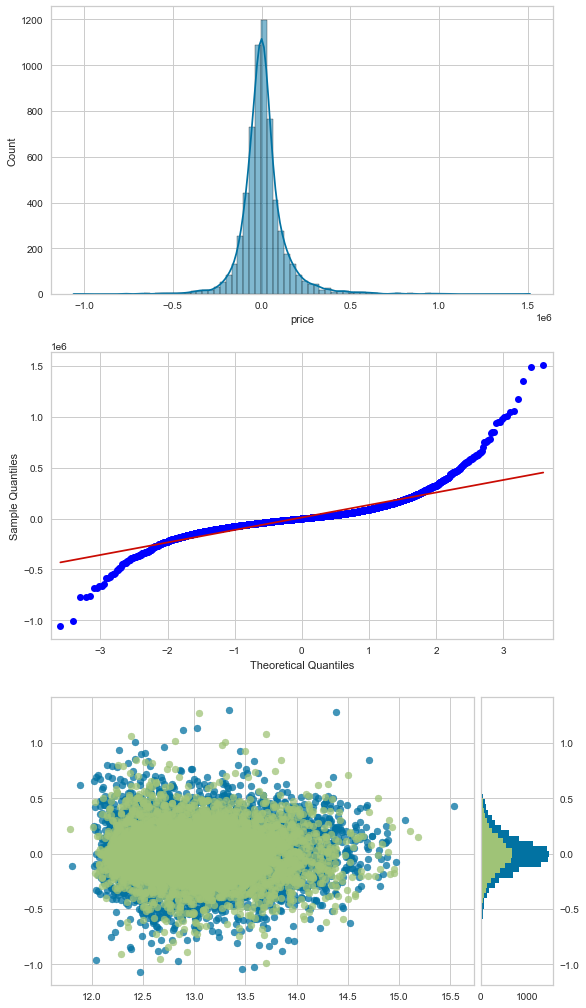

R2_train: 0.854
R2_test: 0.854
Durbin-Watson: 1.989
Train Mean Squarred Error: 16699804004.188
Test Mean Squarred Error: 18343815167.315
Test RMSE: 135439.341


In [85]:
# getting performance numbers and plotting residuals for our model
res_plots_log(mlr_9, X_train_scaled_ord, X_test_scaled_ord, y_train_log, y_test_log)

The final predictive model achieved an RMSE of \\$135,000. This is a good start for creating a tool that can be used in tandem with expert discretion. While the qqplot still suggests that the underlying relationship of the model is not linear, the other residual plots and Durbin-Watson score show that the model fits the assumptions of linear model decently.

### Final Model Visualization

In [86]:
# creating the predictions for our testing data
# to use in the visualization of model performance
test_preds = mlr_9.predict(X_test_scaled_ord)

Below we plotted our predicted values versus our actual values on a scatterplot. Here we see that our slope is about 1 and the y-intercept is about 0 signifying that our predictions followed the actual values quite closely. All of the values are pretty neatly clustered around the line, besides our outliers, which start to pull away from the line. Figuring out how to be more accurate when removing outliers could greatly improve our model.

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-87-801ebbbc7b41>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', '3,500,000', '4,000,000', '4,500,000'])
<ipython-input-87-801ebbbc7b41>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', '3,500,000', '4,000,000', '4,500,000'])


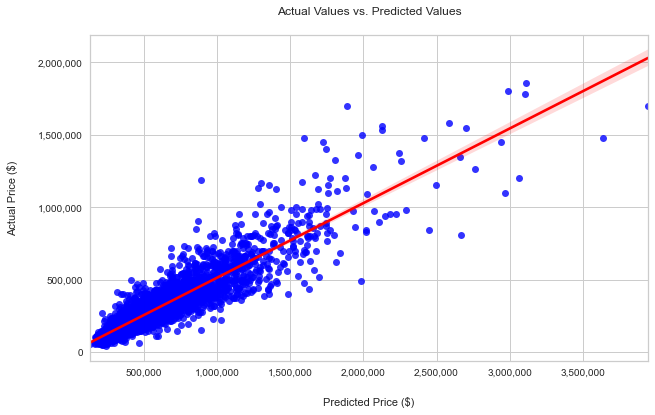

In [87]:
# plotting the actual vs predicted values for our final predictive model
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(np.exp(test_preds), np.exp(y_test_log), scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set_title('Actual Values vs. Predicted Values', pad=20)
ax.set_ylabel('Actual Price ($)', labelpad=20)
ax.set_xlabel('Predicted Price ($)', labelpad=20)
ax.set_yticklabels(['0', '0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', '3,500,000', '4,000,000', '4,500,000'])
ax.set_xticklabels(['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', '3,500,000', '4,000,000', '4,500,000'])
plt.savefig('Images/preds_actual_regplot.png', bbox_inches='tight')


## Inferential Model

While our model above performed very well for predicting prices, it has a couple characteristics that make it hard to work with when using inferentially. The standard scaling of the model standardizes the coefficients given to us in the model so that we can directly compare them, but it also means that the coefficients become less interpretable for inferential insights. We'll need to go back to the unscaled training data for this model. Furthermore, we took the logarithm of price to improve our model, but this also makes the model much less interpretable. While we will be hurting the coefficent of determination by reverting the target back to it's original form, this will allow us to make useful insights from the model

In [88]:
X_train_enc = X_train_enc.drop(columns= ['bedrooms','basement'])
X_test_enc = X_test_enc.drop(columns= ['bedrooms','basement'])

In [89]:
# use this for inferential
# un-loged and un-scaled 
col_use = X_train_enc
mlr_10_unscaled = LinearRegression()
mlr_10_unscaled.fit(X_train_enc, y_train)
print(mlr_10_unscaled.score(X_train_enc, y_train))
print(mlr_10_unscaled.score(X_test_enc, y_test))

0.7920735627496038
0.7920328045983807


As expected, our coefficient of determination is not as high as in our final predictive model, but we can make many more useful insights given this model.

In [90]:
# getting our in-depth statistics for the model
mlr_10_unscaled_ols = sm.OLS(y_train, sm.add_constant(X_train_enc))
mlr_10_unscaled_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     590.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:21:42   Log-Likelihood:            -1.6807e+05
No. Observations:               12628   AIC:                         3.363e+05
Df Residuals:                   12546   BIC:                         3.369e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.133e+05   1.34e+04     -8.440      0.000    -1.4e+05    -8.7e+04
ohe__x0_YES        5.166e+05   1.99e+04     25.931      0.000    4.78e+05    5.56e+05
ohe__x1_EXCELLENT  2.589e+05    1.5e+04     17.230      0.000    2.29e+05    2.88e+05
ohe__x1_FAIR       1.588e+04   1.26e+04      1.255      0.209   -8912.981    4.07e+04
ohe__x1_GOOD       1.014e+05   1.09e+04      9.274      0.000       8e+04    1.23e+05
ohe__x1_NONE      -7.302e+04   6611.826    -11.044      0.000    -8.6e+04   -6.01e+04
ohe__x2_Fair       6483.5836   1.55e+04      0.417      0.677    -2.4e+04     3.7e+04
ohe__x2_Good       1.121e+04   3194.078      3.510      0.000    4950.866    1.75e+04
ohe__x2_Poor      -9.426e+04    3.3e+04     -2.859      0.004   -1.59e+05   -2.96e+04
ohe__x2_Very Good  5.188e+04   5117.751     10.137      0.000    4.18e+04    6.19e+04
ohe__x3_98002       2.47e+04   1.67e+04      1.480      0.139   -8003.995    5.74e+04
ohe__x3_98003      9301.8649   1.49e+04      0.624      0.532   -1.99e+04    3.85e+04
ohe__x3_98004      8.012e+05   1.51e+04     53.155      0.000    7.72e+05    8.31e+05
ohe__x3_98005      3.427e+05    1.7e+04     20.126      0.000    3.09e+05    3.76e+05
ohe__x3_98006       3.04e+05   1.36e+04     22.408      0.000    2.77e+05    3.31e+05
ohe__x3_98007      2.776e+05   1.98e+04     14.047      0.000    2.39e+05    3.16e+05
ohe__x3_98008      2.631e+05   1.49e+04     17.711      0.000    2.34e+05    2.92e+05
ohe__x3_98010      6.877e+04   2.19e+04      3.143      0.002    2.59e+04    1.12e+05
ohe__x3_98011      1.301e+05   1.63e+04      7.958      0.000     9.8e+04    1.62e+05
ohe__x3_98014      1.241e+05   2.06e+04      6.013      0.000    8.36e+04    1.65e+05
ohe__x3_98019      9.303e+04   1.67e+04      5.575      0.000    6.03e+04    1.26e+05
ohe__x3_98022      1.284e+04   1.62e+04      0.793      0.428   -1.89e+04    4.46e+04
ohe__x3_98023     -2.323e+04   1.29e+04     -1.799      0.072   -4.85e+04    2079.193
ohe__x3_98024       1.86e+05   2.22e+04      8.373      0.000    1.42e+05     2.3e+05
ohe__x3_98027       1.81e+05   1.39e+04     12.991      0.000    1.54e+05    2.08e+05
ohe__x3_98028      1.206e+05   1.52e+04      7.946      0.000    9.08e+04     1.5e+05
ohe__x3_98029      2.427e+05   1.44e+04     16.842      0.000    2.14e+05    2.71e+05
ohe__x3_98030       865.6454    1.5e+04      0.058      0.954   -2.86e+04    3.03e+04
ohe__x3_98031      1.712e+04   1.55e+04      1.103      0.270   -1.33e+04    4.75e+04
ohe__x3_98032      5671.6688   1.92e+04      0.296      0.767   -3.19e+04    4.33e+04
ohe__x3_98033      3.811e+05   1.35e+04     28.278      0.000    3.55e+05    4.08e+05
ohe__x3_98034      2.206e+05   1.28e+04     17.247      0.000    1.96e+05    2.46e+05
ohe__x3_98038      3.183e+04   1.26e+04      2.520      0.012    7074.959

Looking at the coefficients of our model, we can now see how different factors change the predictions for our house. When looking at square footage of a house, a 1 sq. ft increase leads to a \\$170 increase in price. For every sq. ft increase in the average size of the houses around you, the price of your home goes up by \\$61. There is also about a \\$9,000 increase in home price for every bathroom that is added. If a house has a waterfront on it's land, the price of the home shoots up by half a million dollars on average. When compared to an 'Average' view, homes with no particularly striking view typically sell for \\$73,000 less. Homes with a 'Fair' view typically sell for \\$16,000 more than homes with an 'Average' view. A 'Good' view for a house will typically shoot up the value of a home by over \\$100,000. An 'Excellent' score will typically increase the price of a home by a vertigonous \\$250,000. However, all of these numbers must be taken with a grain of salt, as there is a high level of multicollinearity in this model. 

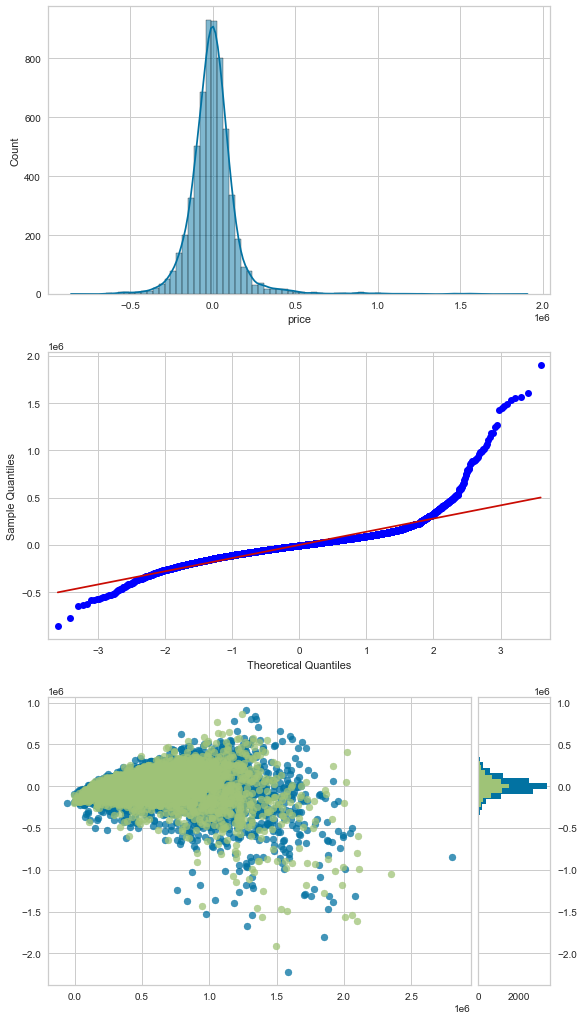

R2_train: 0.792
R2_test: 0.792
Durbin-Watson: 1.960
Train Mean Squarred Error: 21289406165.553
Test Mean Squarred Error: 24335738700.576
Test RMSE: 155999.162


In [91]:
# getting performance numbers and plotting residuals
res_plots(mlr_10_unscaled, X_train_enc, X_test_enc, y_train, y_test)

Our model is much more heteroskedastic now, which makes sense given that we had to work with the non-normally distributed price variable as our target. This also weakens the inferential power of our model since we cannot assert all of the assumptions that form the foundation of linear modeling. 

## Visualizations for presentation

Now that we have a model that explains which predictors drive price, we need to visualizations that explain our findings to the stakeholders. We'll need to reassemble the data first, and then we'll be able to show graphs that quickly visualize the main ideas behind our model to non-technical audiences.

In [92]:
# concatenating the training data back together
concat_train = pd.concat([X_train_ord[['bathrooms', 'sqft_living', 'waterfront', 'view', 'sqft_living15']], y_train], axis=1)

In [93]:
# concatentating the testing data back together
concat_test = pd.concat([X_test_ord[['bathrooms', 'sqft_living', 'waterfront', 'view', 'sqft_living15']], y_test], axis=1)

In [94]:
# concatenating both of the testing and training dfs back together
visualization_df = pd.concat([concat_train, concat_test])
visualization_df

,bathrooms,sqft_living,waterfront,view,sqft_living15,price
7042,1.75,1990.0,0.0,0.0,1820.0,328000.0
10640,1.00,1410.0,0.0,0.0,1400.0,295832.0
14306,2.75,1350.0,0.0,0.0,1410.0,405500.0
11558,1.50,1550.0,0.0,0.0,1970.0,510000.0
7208,2.75,2990.0,0.0,0.0,2990.0,779950.0
...,...,...,...,...,...,...
13951,1.00,1370.0,0.0,0.0,1690.0,720000.0
7611,1.75,1220.0,0.0,0.0,1240.0,257000.0
3852,2.50,2880.0,0.0,3.0,2470.0,535000.0
1986,1.00,1560.0,0.0,0.0,1890.0,627500.0


### Categorical Features

Now, that we have a data frame that we can use for visualizations, we want to start making graphs that show these. A bar plot is the most intuitive choice of graph for categorical features, any audience should be able to quickly pick up on the point made by our graphs.

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-95-9e3f2dbbcd41>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', '1,400,000', '1,600,000', '1,800,000'])


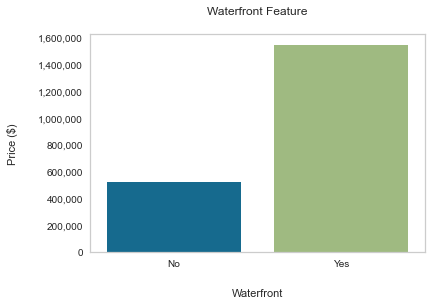

In [95]:
# Waterfront vs. Price plot
fig, ax = plt.subplots()
    
sns.barplot('waterfront', 'price', data=visualization_df, ci=None),
ax.set_yticklabels(['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', '1,400,000', '1,600,000', '1,800,000'])
ax.set_ylabel('Price ($)', labelpad=20)
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Waterfront', labelpad=20)
ax.grid(False)
ax.set_title('Waterfront Feature', pad=20)
plt.savefig('Images/waterfront_bar.png', bbox_inches='tight')

plt.show()

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-96-4da957efbd3c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', '1,400,000', '1,600,000', '1,800,000'])


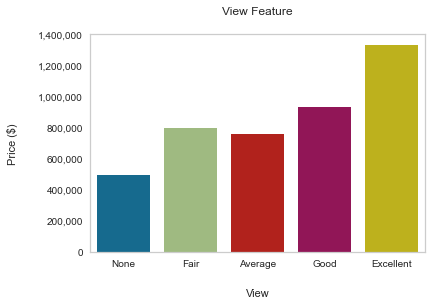

In [96]:
# View vs. Price plot
fig, ax = plt.subplots()
    
sns.barplot('view', 'price', data=visualization_df, ci=None),
ax.set_yticklabels(['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', '1,400,000', '1,600,000', '1,800,000'])
ax.set_ylabel('Price ($)', labelpad=20)
ax.set_xticklabels(['None', 'Fair', 'Average', 'Good', 'Excellent'])
ax.set_xlabel('View', labelpad=20)
ax.grid(False)
ax.set_title('View Feature', pad=20)
plt.savefig('Images/view_bar.png', bbox_inches='tight')

plt.show()

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-97-bbdfdba27e16>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', '1,400,000', '1,600,000', '1,800,000'])


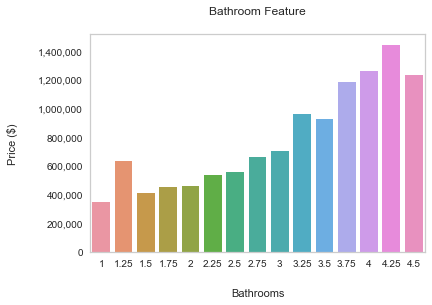

In [97]:
# Num. of Bathrooms vs Price plot
fig, ax = plt.subplots()
    
sns.barplot('bathrooms', 'price', data=visualization_df, ci=None),
ax.set_yticklabels(['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', '1,400,000', '1,600,000', '1,800,000'])
ax.set_ylabel('Price ($)', labelpad=20)
ax.set_xticklabels(['1', '1.25', '1.5', '1.75', '2', '2.25', '2.5', '2.75', '3', '3.25', '3.5', '3.75', '4', '4.25','4.5'])
ax.set_xlabel('Bathrooms', labelpad=20)
ax.grid(False)
ax.set_title('Bathroom Feature', pad=20)
plt.savefig('Images/bathroom_bar.png', bbox_inches='tight')

plt.show()

### Numerical Features

A regression plot is the most intuitive plot to use for illustrating the relationship between our numerical features and price. Stakeholders will follow the trend line and understand that as our feature goes up, so does the price.

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-98-65ecf1e1f2cf>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', '3,500,000', '4,000,000'])


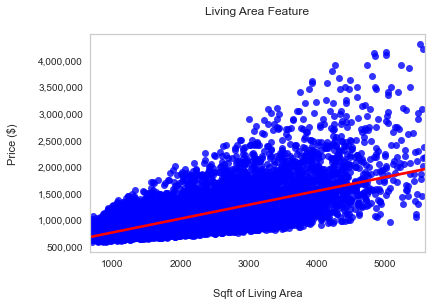

In [98]:
# living area vs price
fig, ax = plt.subplots()
    
sns.regplot('sqft_living', 'price', data=visualization_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set_yticklabels(['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', '3,500,000', '4,000,000'])
ax.set_ylabel('Price ($)', labelpad=20)
ax.set_xlabel('Sqft of Living Area', labelpad=20)
ax.grid(False)
ax.set_title('Living Area Feature', pad=20)
plt.savefig('Images/sqft_living_regplot.png', bbox_inches='tight')

plt.show()

C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-99-9dff2f984fe1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', '3,500,000', '4,000,000'])


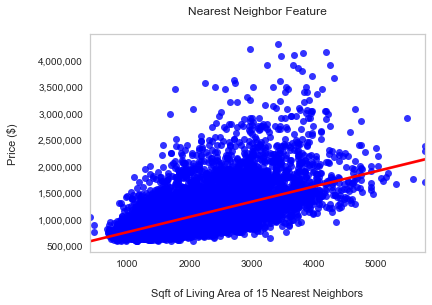

In [99]:
# living space of neighbors vs price
fig, ax = plt.subplots()
    
sns.regplot('sqft_living15', 'price', data=visualization_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set_yticklabels(['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', '3,500,000', '4,000,000'])
ax.set_ylabel('Price ($)', labelpad=20)
ax.set_xlabel('Sqft of Living Area of 15 Nearest Neighbors', labelpad=20)
ax.grid(False)
ax.set_title('Nearest Neighbor Feature', pad=20)
plt.savefig('Images/sqft_living15_regplot.png', bbox_inches='tight')

plt.show()

## Conclusion

Overall, all the model building and data cleaning gave us the RMSE value of about $132,000. The model can be more precise with a lower RMSE, but the model is accurate in that it will predict the price within the range. Also, as seen by the qq plot, the linearity assumption is violated. With further data collection and research, the model can be improved. The focus should be on square foot living because we saw that, that was the highest correlated with the price.

By digging deep into the data and exhaustively testing variables, we have came up with both a predictive and inferential linear model that can expand your understanding of the King County real estate market. There are some obvious ways that you could bolster your business listed below. With our help we could come up with countless other insights, implementations, and recommendations that push your real estate company to the top. 

#### Possible Implementations of the model

Given that we had the funding to improve our predictive and inferential models, there are several business opportunities afforded by these models. Some of the most obvious implementations of our models would be:
- The predictive model could be used to create an estimate of the value of current inventory. This could be used to abbreviate the process for selling houses and to mitigate human error in the evaluation proces.
- The predictive model could also be a powerful tool in creating a short-list of undervalued homes that would be advantageous to acquire. While it is always important to have an experienced agent behind the acquisition of new assets, this tool would provide great utility in giving a compass for profitable acquisitions. 
- The inferential model could be a powerful tool when buying undeveloped or derelict real estate that requires construction of new housing. The model can explain what characteristics drive the prices of the house and help find the perfect balance of features to maximize profits. 

### Recommendations

1. Use our model to accurately price the current inventory.
- The housing market is inefficient. Often, there are multiple bids for one ask.
- Houses are priced sometimes at an arbritrary matter due to emotion and sentimentality.
- Our Model forgoes these drawbacks and provides data-backed pricing tool.
2. Use our model to find undervalued homes.
- When growing portfolio, it is cruxcial for new acuisition to be proftiibale.
- Our model offers an accurate listing price, allowing the stakeholder to acquire undervalued properties which can be sold for a profit.
3. Use the model to find the best features to include in new home builds.
- When growing the porfolio through constructing new homes, our model accurately depicts the impact that the above featuires will have on the price.
- This steers the stakeholder into the proper direction. This allows the stakeholder to make better choices in regards to the house features, which they will include in the new builds.